<div style="text-align: right" align="right"><i>Peter Norvig, December 2024</i></div>

# Advent of Code 2024

I  enjoy doing the [**Advent of Code**](https://adventofcode.com/) (AoC) programming puzzles, so here we go for 2024! This is the 10th year, so congratulations to puzzle creator [**Eric Wastl**](https://adventofcode.com/2024/about). Our old friend [**Gary Grady**](https://find.sciences.social/search/accounts/@garygrady@mastodon.social) is here to provide illustrations:

<a href="https://x.com/garyjgrady"><img src="https://pbs.twimg.com/media/Gdp709FW8AAq2_m?format=jpg&name=medium" width=400 alt="GaryJGrady cartoon"></a>

Even before December 1st I can start by loading up my [**AdventUtils.ipynb**](AdventUtils.ipynb) notebook (same as last time except for the `current_year`):

In [2]:
%run AdventUtils.ipynb
current_year = 2024

print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


Each day's solution consists of three parts, making use of my `parse` and `answer` utilities:
- **Reading the input**. Parse the input file with, e.g. `pairs = parse(1, ints)`. 
- **Solving Part One**. Find the solution and record it with, e.g., `answer(1.1, 4, lambda: 2 + 2)`.
- **Solving Part Two**. Find the solution and record it with, e.g., `answer(1.2, 9, lambda: 3 * 3)`.

The function `parse` assumes that the input is a sequence of sections (default one per line), each of which should be parsed in some way and then returned as a tuple.  The parsing method  `ints` says to treat each section as a tuple of integers. The function `answer` checks that the correct answer is computed (useful for regression testing), and records the run time (that's why a `lambda:` is used). You can read the [**AdventUtils.ipynb**](AdventUtils.ipynb) notebook for more on these functions (and the other utilities used throughout this notebook, such as the `Grid` class).

To fully understand each day's puzzle, and to follow along the drama involving Santa, the elves, the reindeer, some elephants, the Chief Historian, and all the rest, you need to read the puzzle descriptions on the [**AoC**](https://adventofcode.com/) site, as linked in the header for each day's solutions (e.g. [**Day 1**](https://adventofcode.com/2023/day/1) below).  

# [Day 1](https://adventofcode.com/2024/day/1) Historian Hysteria

According to the narrative, North Pole Historians created two lists of **location IDs**. We can parse them as a sequence of pairs of integers, and then use the transpose function, `T`, from my [AdventUtils](AdventUtils.ipynb) to get two lists of ID numbers:

In [5]:
left, right = location_ids = T(parse(1, ints))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
38665   13337
84587   21418
93374   50722
68298   57474
54771   18244
49242   83955
66490   44116
65908   51323
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(38665, 13337)
(84587, 21418)
(93374, 50722)
(68298, 57474)
(54771, 18244)
(49242, 83955)
(66490, 44116)
(65908, 51323)
...


<img src="https://pbs.twimg.com/media/GdvPVOpXcAEZ34_?format=jpg&name=medium" width=400>

### Part 1: What is the total distance between your lists?

The **distance** between two numbers is defined as the absolute value of their difference, and the **total distance** between two lists is the sum of the distances between respective pairs, where "respective" means to sort each list and then take the distance between the first element of each list, plus the distance between the second element of each list, and so on. (I use the transpose utility function, `T`, to turn the input sequence of 1000 pairs into two lists, each of 1000 integers.)

In [7]:
def total_distance(left: Ints, right: Ints) -> int:
    """Total distance between respective list elements, after sorting."""
    return sum(abs(a - b) for a, b in zip(sorted(left), sorted(right)))

In [8]:
answer(1.1, 1830467, lambda:
       total_distance(left, right))

Puzzle  1.1:   .000 seconds, answer 1830467           ok

### Part 2: What is their similarity score?

The **similarity score** is defined as the sum of each element of the left list times the number of times that value appears in the right list.

In [10]:
def similarity_score(left: Ints, right: Ints) -> int:
    """The sum of each x in `left` times the number of times x appears in `right`."""
    counts = Counter(right)
    return sum(x * counts[x] for x in left)

In [11]:
answer(1.2, 26674158, lambda:
       similarity_score(left, right))

Puzzle  1.2:   .000 seconds, answer 26674158          ok

# [Day 2](https://adventofcode.com/2024/day/2): Red-Nosed Reports

Today's input is a sequence of **reports**, each of which is a sequence of integers:

In [13]:
reports = parse(2, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
74 76 78 79 76
38 40 43 44 44
1 2 4 6 8 9 13
65 68 70 72 75 76 81
89 91 92 95 93 94
15 17 16 18 19 17
46 47 45 48 51 52 52
77 78 79 82 79 83
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(74, 76, 78, 79, 76)
(38, 40, 43, 44, 44)
(1, 2, 4, 6, 8, 9, 13)
(65, 68, 70, 72, 75, 76, 81)
(89, 91, 92, 95, 93, 94)
(15, 17, 16, 18, 19, 17)
(46, 47, 45, 48, 51, 52, 52)
(77, 78, 79, 82, 79, 83)
...


### Part 1: How many reports are safe?

A report is **safe** if it is  monotonically strictly increasing or strictly decreasing, and if no difference between adjacent numbers is greater than 3 in absolute value.

In [15]:
def is_safe(report: Ints) -> bool:
    """A report is safe if all adjacent-number-differences are either in {1, 2, 3} or in {-1, -2, -3}."""
    deltas = diffs(report)
    return deltas.issubset({1, 2, 3}) or deltas.issubset({-1, -2, -3})
    
def diffs(report: Ints) -> Set[int]:
    """The set of differences between adjacent numbers in the report."""
    return {report[i] - report[i - 1] for i in range(1, len(report))}

Here are examples of how these functions work:

In [17]:
assert diffs((7, 6, 4, 2, 1)) == {-1, -2}
assert is_safe((7, 6, 4, 2, 1))  == True

And here is the answer to the puzzle:

In [19]:
answer(2.1, 257, lambda:
       quantify(reports, is_safe))

Puzzle  2.1:   .000 seconds, answer 257               ok

Note: I used my [AdventUtils](AdventUtils.ipynb) function `quantify`, where `quantify(reports, is_safe)` means the number of items in `reports` for which `is_safe` is true.

### Part 2: How many reports are safe using the Problem Dampener?

The **problem dampener** says that a report is safe if there is some way to drop one element and get a safe report.

In [21]:
def is_safe_with_dampener(report: Ints) -> bool:
    """Is there any way to drop one element of `report` to get a safe report?"""
    return any(map(is_safe, drop_one(report)))

def drop_one(seq: Sequence) -> Iterable:
    """All ways of dropping one element of the input sequence."""
    return (seq[:i] + seq[i + 1:] for i in range(len(seq)))

assert set(drop_one('1234')) == {'234', '134', '124', '123'}

In [22]:
answer(2.2, 328, lambda:
       quantify(reports, is_safe_with_dampener))

Puzzle  2.2:   .002 seconds, answer 328               ok

# [Day 3](https://adventofcode.com/2024/day/3): Mull It Over

Today's input is a computer program with some corrupted characters. The program has multiple lines, but newlines don't matter in this programming language, so I will concatenate them into one big string:

In [24]:
program = cat(parse(3))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 6 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
where(536,162)~'what()what()how(220,399){ mul(5,253);mul(757,101)$where()@why()who()&when()from( ...
}?~who()select()-mul(316,505)&%*how()mul(363,589)>?%-:)where()~{{mul(38,452)select()%>[{]%>%mul( ...
?>where(911,272)'mul(894,309)~+%@#}@#why()mul(330,296)what()mul(707,884)mul;&}<{>where()$why()]m ...
> (when()[where()/#!/usr/bin/perl,@;mul(794,217)select():'])select()mul(801,192)why()&]why()/:]* ...
,+who():mul(327,845)/ >@[>@}}mul(86,371)!~&&~how(79,334)mul(637,103)why()mul(358,845)-#~?why(243 ...
where()#{*,!?:$mul(204,279)what()!{ what()mul(117,94)!select()>:mul(665,432)#don't()!!<!? mul(50 ...


<a href="https://x.com/garyjgrady"><img src="https://pbs.twimg.com/media/Gd5ZSI9XEAAAzQh?format=jpg&name=small" width=400 alt="GaryJGrady cartoon"></a>


### Part 1: What do you get if you add up all of the results of the multiplications?

For Part 1, just look for instructions of the form "mul(*digits*,*digits*)", using a regular expression and `re.findall`. Perform each of these multiplications and add them up, and ignore all other characters/instructions:

In [26]:
def execute(program: str) -> int:
    """The sum of the results of the multiply instructions."""
    return sum(prod(ints(m)) for m in all_multiplications(program))

all_multiplications = re.compile(r'mul\(\d+,\d+\)').findall

In [27]:
answer(3.1, 156388521, lambda: 
       execute(program))

Puzzle  3.1:   .001 seconds, answer 156388521         ok

Here's an example of `all_multiplications`:

In [29]:
assert all_multiplications("mul(1,2) + mul(34,5) - mul(67,89] / mul(x,15)") == ['mul(1,2)', 'mul(34,5)']

### Part 2: What do you get if you add up all of the results of just the enabled multiplications?

For Part 2, the instruction "`don't()`"  says to **disable** (ignore) following multiply instructions until a "`do()`" instruction **enables** them again. I will define the function `enabled`, which returns the part of the program that is enabled, by susbstituting a space for the "`don't()...do()`" sequence (or a "`don't()...`" sequence that goes to the end of the file).

In [31]:
def enabled_part(program: str) -> str:
    """Just the part of the program that is enabled; remove "don't()...do()" text."""
    return re.sub(r"don't\(\).*?(do\(\)|$)", " ", program)

In [32]:
answer(3.2, 75920122, lambda:
       execute(enabled_part(program)))

Puzzle  3.2:   .000 seconds, answer 75920122          ok

# [Day 4](https://adventofcode.com/2024/day/4): Ceres Search

Today's puzzle is a 2D word-search puzzle:

In [34]:
xmas_grid = Grid(parse(4))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 140 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
MASAMXMSSXXMAMXXMXMASXMASXMMSMSMMMAXMASASMMSSMSXAXMASMMSMMMSSMSASMSSSSMSMSMXXMXMAXAMXMSMSSXSAMXM ...
MASMMXMASAXASMSMMMSAMXSMSAMXAAAAAXAMXASXAMAAAAMMSMMMMMASXAAAAMMAMAMMASAAAAXMXMSSSSSSMMSAMAXAXXSM ...
MMXAXMMMSXMAMAAXAAXAAAXXSMMSMSMSMXAXMXSMMMMSSMXAMXAAXMAMMMMSSMMAMAMMAMMMMMXSAAXAAMMAXXSAMXMSMAXM ...
SXSAMASASMSXMSMSMSSMMMMMMXAMXMMXMASMMMMAXXAAAMMMSSSSSMASXXAAXASMSXXMXSXSXSASMSMMSMSAMMMAMXAAMASX ...
AAAXXXMASASXMXMAXXMMASAASMXSASASXAAAAMSSMMMSXMAAMMMMMXAXMMMMSAMXAMASAMXSAMASXXAXAAMAMXSAMXSXSMMA ...
MSMMXXMMMAMAMMMMMMXSAXXAMMMMXSAXMMXXAMXAAMMXMASXMAAASMMXAAMXAXAMMMAMAMAMAMXMASXMMXMAAXMAXMAMXMSA ...
MXAXAMXXMMMMSAMAASMMMSMMASASAMAMAXMSXMSMMXAMXAXMMSSXSASXSSSMAMSMXMXSAMSSSMAMXMXAMAXXMMSAXAXMMXMA ...
ASXMMXSAMXAASXXMXSAAAXASAMMMASMSSSMAAMMXMMSSMASAMAMMMAMMAXMAXMASXM

### Part 1: How many times does XMAS appear?

We just have to find how many times the word "XMAS" appears in the grid, horizontally, vertically, or diagonally, forwards or backwards.  The variable `directions8` contains those eight directions (as (delta-x, delta-y) pairs). So examine each square of the grid and if it contains "X", see in how many of the directions it spells "XMAS". (Note that locations in the grid are denoted by `(x, y)` coordinates, as are directions (e.g., `(1, 0)` is the `East` direction. (The functions `add` and `mul` do addition and scalar multiplication on these 2D vectors.)

In [36]:
def word_search(grid: Grid, word='XMAS') -> int:
    """How many times does the given word appear in the grid?"""
    return quantify(grid_can_spell(grid, start, dir, word) 
                    for start in grid 
                    if grid[start] == word[0]
                    for dir in directions8)

def grid_can_spell(grid, start, dir, word):
    """Does `word` appear in grid starting at `start` and going in direction `dir`?"""
    return all(grid[add(start, mul(dir, i))] == word[i] 
               for i in range(len(word)))

In [37]:
answer(4.1, 2401, lambda:
       word_search(xmas_grid))

Puzzle  4.1:   .020 seconds, answer 2401              ok

### Part 2: How many times does an X-MAS appear?

Upon further review, the goal is not to find "XMAS" byt rather X-"MAS"; that is, two "MAS" words in an X pattern. The pattern can be any of these four:

     M.S     S.M     M.M     S.S
     .A.     .A.     .A.     .A.
     M.S     S.M     S.S     M.M

I decided to find these by first looking for each the middle letter ("A") in the grid, and then, for each "A" and for each of the four pairs of diagonal directions, see if the target word ("MAS") can be spelled in both directions:

In [39]:
diagonal_pairs = ([SE, NE], [SW, NW],  [SE, SW], [NE, NW])

def x_search(grid: Grid, word='MAS') -> int:
    """How many times does an X-MAS appear in the grid?"""
    A = word[1] # The letter in the middle of the cross
    return quantify((grid_can_spell(grid, sub(mid_pos, dir1), dir1, word) and
                     grid_can_spell(grid, sub(mid_pos, dir2), dir2, word))
                    for mid_pos in grid.findall(A) # All positions where A appears
                    for dir1, dir2 in diagonal_pairs)

In [40]:
answer(4.2, 1822, lambda:
       x_search(xmas_grid))

Puzzle  4.2:   .016 seconds, answer 1822              ok

# [Day 5](https://adventofcode.com/2024/day/5): Print Queue

Today's puzzle involves some **sleigh launch safety manuals** that need to be updated with new printings. The day's input is in two sections: the first a set of **rules** such as "47|53", which means that if an update prints both page 47 and page 53, then it must print 47 sometime before 53. The second section is a list of **updates** of the form "75,47,61,53,29", meaning that for one version of the safety manual, those are the pages that need to be printed, and that is the suggested order of printing.

<img src="https://pbs.twimg.com/media/GeEU0XgWAAARMw-?format=jpg&name=medium" width=400>

I mostly like my `parse` function: it is easy to tell it how to break the input into sections and how to parse every section. But I admit my `parse` is not ideal when an input file has sections with two different formats. I'll parse the two sections as paragraphs, and then call `parse` again on each paragraph:

In [42]:
manual  = parse(5, sections=paragraphs)
rules   = set(parse(manual[0], ints))
updates = parse(manual[1], ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1366 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
48|39
39|84
39|23
95|51
95|76
95|61
14|52
14|49
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
48|39
39|84
39|23
95|51
95|76
95|61
14|52
14|49
14|39
14|53
85|19
85|25
85|61
85|35
85|58
74|86
 ...
61,58,51,32,12,14,71
58,25,54,14,12,94,32,76,39
35,53,26,77,14,71,25,76,85,55,51,49,95
32,91,76, ...


Here I show what the rules and updates look like:

In [44]:
assert (48, 39) in rules # `rules` is a set of (earlier, later) page number pairs
assert updates[0] == (61, 58, 51, 32, 12, 14, 71) # `updates` is a sequence of page number tuples

### Part 1: What do you get if you add up the middle page number from the correctly-ordered updates?

An update is correct if no combination of two pages in the update violates any of the rules. I'll define `is_correct` to implement this check, and `sum_of_correct_middles` to add up the middle numbers of the correct updates:

In [46]:
def sum_of_correct_middles(rules: Set[Ints], updates: Tuple[Ints]) -> int:
    """The sum of the middle elements of each update that is correct."""
    return sum(middle(update) for update in updates if is_correct(update, rules))

def is_correct(update: Ints, rules: Set[Ints]) -> bool:
    """An update is correct if no pair of pages violates a rule in the rules set."""
    return not any((second, first) in rules for (first, second) in combinations(update, 2))

def middle(seq: Sequence) -> object: return seq[len(seq) // 2]

In [47]:
answer(5.1, 5762, lambda:
       sum_of_correct_middles(rules, updates))

Puzzle  5.1:   .001 seconds, answer 5762              ok

### Part 2: What do you get if you add up the middle page numbers of the correction of each incorrect update?

In Part 2 we have to find the incorrect updates, re-order them into a correct order, and sum the middle page numbers of just these corrected updates.
Since I have already defined `is_correct`, I could just generate all permutations of each update and find one that `is_correct`. That would work great if the longest update consists of only 5 pages, as it does in the example input. But what is the longest update in *my* input?

In [49]:
max(map(len, updates))

23

That's not great. With 23 page numbers there are 23! permutations, which is over 25 sextillion. So instead, here's my strategy:

- Instead of generating all permutations, `correction` will **sort** an update, returning a corrected reordering that obeys all the rules. This is a [topological sort](https://en.wikipedia.org/wiki/Topological_sorting) and is guaranteed to give a correct reordering (unless the rules contain a contradiction like "2 must be before 3 and 3 must be before 2"). There may be multiple correct orderings (for example, if there are no rules involving the pages in the update, then any ordering is correct). It used to be that Python's `sort` method allowed a `cmp` keyword to compare two values; there is vestigial support for this with the `functools.cmp_to_key` function. I will sort each update so that page *m* comes before page *n* if (*m*, *n*) is in the rules, and *m* comes after *n* if (*n*, *m*) is in the rules. Sorting will be about a sextillion times faster than enumerating permutations.
- `corrected` will find all the incorrect updates and correct them.

In [51]:
def correction(update: Ints, rules) -> Ints:
    """Reorder the update to make it correctly obey all the rules."""
    def rule_lookup(m, n): return +1 if (m, n) in rules else -1 if (n, m) in rules else 0
    return sorted(update, key=functools.cmp_to_key(rule_lookup))

def corrected(updates, rules) -> List[Ints]:
    """Returns a list of corrected versions of all the incorrect rules."""
    return [correction(update, rules) for update in updates if not is_correct(update, rules)]

In [52]:
answer(5.2, 4130, lambda:
       sum_of_correct_middles([], corrected(updates, rules)))

Puzzle  5.2:   .001 seconds, answer 4130              ok

I have to say, I'm pleased that this day I got both parts right with no errors (and in fact, the same for the previous days). I was worried I might have my `+1` and `-1` backwards in `cmp_to_key`, but so far, everything has gone smoothly. (However, even if I started solving the moment that the puzzles are released, I wouldn't show up on the leaderboard;  I'm still *way* slower than the skilled contest programmers.

# [Day 6](https://adventofcode.com/2024/day/6): Guard Gallivant

Today's input is a 2D map of the manufacturing lab, with "`.`" indicating an empty space, "`#`" indicating an obstruction, and "`^`" indicating the position of the security guard.

In [55]:
lab_grid = Grid(parse(6))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 130 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
........#........................................#......#........#.............................. ...
....................................#......#.....#............#.............#..........#........ ...
......................#.......................................................#................. ...
.......#..#..#....#...#...#....#..............#......#.......#...#................#.......#..... ...
......................#....##...#.......#....#.......................................#.......... ...
...#............................#........................................#...................... ...
....................#............#...............#......#.........#...........#................. ...
............................#......#...#................#.........

### Part 1: How many distinct positions will the guard visit before leaving the mapped area?

The guard follows this protocol: 
- If there is something directly in front of you, turn right 90 degrees.
- Otherwise, take a step forward.

I'll define `follow_path` to output a list of all the positions the guard occupies. I realize the puzzle is only asking for a *count* of the positions, but the path might be useful for Part 2, or for debugging, so I'll return it. I worried that it is also possible for a path to become a loop, but the puzzle statement specifically says that can't happen (the guard will always march off the grid), so I won't test for it.

In [57]:
def follow_path(grid: Grid, guard='^', facing=North) -> List[Point]:
    """A list of all points in the path followed by the guard.
    The guard turns right when there is an obstacle ahead, otherwise goes forward."""
    path = grid.findall(guard) # A one-element list of positions, e.g. [(3, 4)]
    while (ahead := add(path[-1], facing)) in grid:
        if grid[ahead] == '#':
            facing = make_turn(facing, 'R')
        else:
            path.append(ahead)
    return path

In [58]:
answer(6.1, 5329, lambda: 
       len(set(follow_path(lab_grid))))

Puzzle  6.1:   .001 seconds, answer 5329              ok

I initially had a **bug**; I returned for the length of the **path**, not the length of the **set** of positions in the path. Since the path crosses itself these two numbers are different.
                                  
### Part 2: How many different positions could you choose for an obstruction to put the guard in a loop?

The historians would like to place a single obstacle so that the guard *will* get stuck in a loop, rather than exiting the grid. They want to know all possible positions for the obstacle. What do we know about such positions?
- An obstacle  position must be somewhere on the guard's path, otherwise it would have no effect.
- The instructions say it can't be the guard's initial position.
- A loop is when the guard's path returns to the same position with the same facing. This means my Part 1 solution, which returns the list of visited positions, is not helpful: it is not a loop if the guard is in position *p* facing East and then later returns to position *p* facing South. 
- Thus, I can detect a loop by keeping a set of previously visited position/facing pairs.
- I can make slightly less work by only storing the *corners* of the path: the places where the guard turns. 
- The simplest approach for finding obstacle positions is to temporarily place an obstacle on each point on the path, one at a time, and see if it leads to a loop.
- There are 5,329 positions on the path, so the runtime should be about 5,000 times longer than Part 1; on the order of 10 seconds or so. I'll try it, and if it seems too slow, I'll try to think of something better.

In [60]:
def is_loopy_path(grid: Grid, guard_pos, facing=North) -> bool:
    """Does the path followed by the guard form a loop?"""
    path = {(guard_pos, facing)}
    while (ahead := add(guard_pos, facing)) in grid:
        if grid[ahead] == '#':
            facing = make_turn(facing, 'R')
            if (guard_pos, facing) in path:
                return True
            path.add((guard_pos, facing))
        else:
            guard_pos = ahead
    return False
    
def find_loopy_obstacles(grid: Grid) -> Iterable[Point]:
    """All positions in which placing an obstacle would result in a loopy path for the guard."""
    guard_pos = the(grid.findall('^'))
    for pos in set(follow_path(grid)) - {guard_pos}:
        grid[pos] = '#' # Temporarily place an obstacle 
        if is_loopy_path(grid, guard_pos):
            yield pos
        grid[pos] = '.' # Remove the temporarily-placed obstacle

In [61]:
answer(6.2, 2162, lambda:
       quantify(find_loopy_obstacles(lab_grid)))

Puzzle  6.2:  1.998 seconds, answer 2162              ok

That was my first run time over a second, but still faster than I thought it would be. I guess many of the obstacles force the guard into a small, fast loop, or an early exit from the grid. Note that in `the(grid.findall('^'))`, `findall` is a method from my `Grid` class that finds all locations where a `'^'` character resides, and `the` is my utility function that returns the first element of a one-element list (and raises an error if there is not exactly one element).

I had a **bug** initially, and never figured out what it was; it went away when I refactored to make the program nicer.

# [Day 7](https://adventofcode.com/2024/day/7): Bridge Repair

The narrative for today involves fixing a bridge, and each line of our input represents a **calibration equation** for the bridge. Unfortunately, some nearby elephants stole all the operators from the equations, so all that is left are the integers:

In [64]:
equations = parse(7, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 850 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
202998336: 686 9 7 62 2 673
19275222: 361 3 7 170 65 5 223
23101: 7 694 916 4 6
2042426: 6 34 2 423 3
40369523: 8 880 91 45 23
46629044796: 990 471 4 4 796
1839056: 3 42 2 4 3 258 703 4 8
26205: 2 9 5 9 9 4 3 7 44 5 8 7
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 850 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(202998336, 686, 9, 7, 62, 2, 673)
(19275222, 361, 3, 7, 170, 65, 5, 223)
(23101, 7, 694, 916, 4, 6)
(2042426, 6, 34, 2, 423, 3)
(40369523, 8, 880, 91, 45, 23)
(46629044796, 990, 471, 4, 4, 796)
(1839056, 3, 42, 2, 4, 3, 258, 703, 4, 8)
(26205, 2, 9, 5, 9, 9, 4, 3, 7, 44, 5, 8, 7)
...


<img src="https://pbs.twimg.com/media/GeOKVYiX0AAwNMy?format=jpg&name=medium" width=400> 

### Part 1: What is the total calibration result of possibly true equations?

Our task is to find operators to balance each equation. The input "`3267: 81 40 27`" can be made into the equation "`3267 = 81 + 40 * 27`", with the understanding that all evaluations are done left-to-right, so this is "`3267 = ((81 + 40) * 27)`". The two allowable operators are addition and multiplication. Our task is to compute the sum of all the equations that can be balanced.

The straightforward approach is to try both operators on every number. If there are *n* numbers in an equation, then there are *n* - 1 numbers on the right-hand side, and *n* - 2 missing operators, so there will be 2<sup>*n*-2</sup> possible equations. Is that going to be a problem?

In [67]:
max(map(len, equations))

13

No problem! With 13 numbers on a line there are just 2<sup>11</sup> = 2048 equations; a small number.  I'll define `can_be_calibrated` to try all possible operator combinations. It goes left-to-right, one number at a time, keeping a list of partial `results` which is updated for each new number in the equation. 

Although the puzzle instructions are a bit vague, it appears that when they say "numbers" they mean "positive integers". Therefore, neither addition nor multiplication can cause a partal result to decrease, so once a partial result exceeds the target, we can drop it.

In [69]:
def can_be_calibrated(equation: ints, operators=(operator.add, operator.mul)) -> bool:
    """Can the equation be balanced using '+' and '*' operators?"""
    target, first, *rest = equation
    results = [first] # A list of all possible results of the partial computation
    for y in rest:
        results = [op(x, y) for x in results if x <= target for op in operators]
    return target in results

def lhs(equation) -> int: "Left-hand side"; return equation[0]

In [70]:
answer(7.1, 1985268524462, lambda:
    sum(lhs(equation) for equation in equations if can_be_calibrated(equation)))

Puzzle  7.1:   .014 seconds, answer 1985268524462     ok

### Part 2: What is the total calibration result of possibly true equations, allowing concatenation?

In Part 2, a third operator is allowed: concatentation. The equation "`192: 17 8 14`" can be balanced by concatenated 17 and 8 to get 178, and then adding 14 to get 192: "`192 = ((17 || 8) + 14)`". With three operators, the equation with 11 operators now has 3<sup>11</sup> = 177,147 possibilities, almost 100 times more than Part 1, so this will take longer:

In [72]:
operators3 = (operator.add, operator.mul, lambda x, y: int(str(x) + str(y)))    

In [73]:
answer(7.2, 150077710195188, lambda:
       sum(lhs(equation) for equation in equations if can_be_calibrated(equation, operators3)))

Puzzle  7.2:   .803 seconds, answer 150077710195188   ok

That was easy, but it is the second-slowest runtime so far. I can make it faster by implementing concatenation by multiplying and adding rather than by string operations.

In [75]:
operators3 = (operator.add, operator.mul, lambda x, y: (x * 10 ** num_digits(y)) + y)

def num_digits(n: int) -> int:
    """The number of digits in a positive integer."""
    if n < 10:     return 1 ## Three special cases cover most calls
    elif n < 100:  return 2
    elif n < 1000: return 3
    result = 1
    while n >= 10:
        result += 1
        n /= 10
    return result

In [76]:
answer(7.2, 150077710195188, lambda:
       sum(numbers[0] for numbers in equations if can_be_calibrated(numbers, operators3)))

Puzzle  7.2:   .606 seconds, answer 150077710195188   ok

Now that we're done with the first week, I'm going to clean up by deleting some of the big data structures that are hanging around.

In [78]:
reports = xmas_grid = manual = rules = updates = lab_grid = equations = None

# [Day 8](https://adventofcode.com/2024/day/8): Resonant Collinearity

Another grid input, this one a map of antenna locations. Each different non-"`.`" character denotes an antenna of a given frequency.

In [80]:
antennas = Grid(parse(8))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 50 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
..................................................
.................................C................
.e..........7O....................................
.....................................z............
......................t.........C.......k.........
............h................................9....
.............5.7....O.............9C..............
.......5.O................T.......................
...


### Part 1: How many unique locations within the bounds of the map contain an antinode?

An **antinode** is defined as a point that is perfectly in line with two antennas of the same frequency, but only when one of the antennas is twice as far away as the other.

That means that if two antennas are at points *A* and *B*, then the two antinodal points are at 2*A* - *B* and 2*B* - A. If there are three or more antennas with the same frequency then we consider each pair of them in turn. So all we have to do is group the antennas by frequency, compute the antinodes for each pair with the same frequency, and determine which of those antinodal points are on the grid.

In [82]:
def antinodes(antennas: Grid) -> Set[Point]:
    """The set of all antinodal points in the grid.
    (That is, points that are of distance d and 2d from same frequency antennas.)"""
    groups = [antennas.findall(f) for f in set(antennas.values()) if f != '.']
    return union(antinodes2(A, B, antennas)
                 for points in groups
                 for A, B in combinations(points, 2))

def antinodes2(A: Point, B: Point, antennas: Grid) -> Set[Point]:
    """The set of antinodal points for two antenna points, A and B."""
    return {P for P in {sub(mul(A, 2), B), sub(mul(B, 2), A)}
              if P in antennas}

In [83]:
answer(8.1, 220, lambda:
       len(antinodes(antennas)))

Puzzle  8.1:   .003 seconds, answer 220               ok

### Part 2: How many unique locations within the bounds of the map contain an updated antinode?

For Part 2, an **updated antinode**  can now occur at *any* point that is exactly on line with two antennas of the same frequency, regardless of distance. So if the two antennas are *A* and *B* then the antinodal points can be found by starting at *A* and going step by step in the direction of the vector *A* - *B* and also in the direction *B* - *A*, going as far as you can while staying on the grid. The `Grid.follow_line` method facilitates that.

I'll refactor `antinodes` to take an `antinodes2` parameter so it can handle both parts:

In [85]:
def antinodes(antennas: Grid, antinodes2=antinodes2) -> Set[Point]:
    """The set of all antinodal points in the grid, according to the `antinode2` function."""
    groups = [antennas.findall(f) for f in set(antennas.values()) if f != '.']
    return union(antinodes2(A, B, antennas)
                 for points in groups
                 for A, B in combinations(points, 2))

def updated_antinodes2(A: Point, B: Point, antennas: Grid) -> Set[Point]:
    """The set of updated antinodal points for two antenna points, A and B."""
    return (set(antennas.follow_line(A, sub(A, B))) | 
            set(antennas.follow_line(A, sub(B, A))))

In [86]:
answer(8.1, 220, lambda:
       len(antinodes(antennas)))

Puzzle  8.1:   .002 seconds, answer 220               ok

In [87]:
answer(8.2, 813, lambda:
       len(antinodes(antennas, updated_antinodes2)))

Puzzle  8.2:   .003 seconds, answer 813               ok

I got both of these right the first time (except for some simple typos: a misplaced paren and typing `grid` when I meant the grid called `antennas`).

# [Day 9](https://adventofcode.com/2024/day/9): Disk Fragmenter

Today we're confronted with a computer disk that needs to be compressed to gain some contiguous free space. The contents of the disk is represented in the **disk map** format: a string of digits, where the digits alternate between the number of blocks of a file, followed by the number of blocks of free space. We'll parse that as a tuple of digits:

In [90]:
disk_map = the(parse(9, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str:
────────────────────────────────────────────────────────────────────────────────────────────────────
692094513253604282899448234539616972499153261626907217394161512944107098953354935354419233821564 ...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1 tuple:
────────────────────────────────────────────────────────────────────────────────────────────────────
(6, 9, 2, 0, 9, 4, 5, 1, 3, 2, 5, 3, 6, 0, 4, 2, 8, 2, 8, 9, 9, 4, 4, 8, 2, 3, 4, 5, 3, 9, 6, 1, ...


<img src="https://pbs.twimg.com/media/GeYt7iuWIAAHxhT?format=jpg&name=medium" width=400>

### Part 1: Compress the hard drive. What is the resulting filesystem checksum? 

We will deal with two formats to represent disks. Consider this **disk map** format:

     1, 2, 3, 4, 5  ## Disk map format

This means that there is 1 block for the first file (which has ID number 0), followed by 2 empty blocks, then 3 blocks for the second file (with ID number 1), followed by 4 empty blocks, and finally 5 blocks for the third file (with ID number 2).  

It makes sense to convert this into a **disk layout** format:  which would be "`", where "`.`" represents an empty block.

     0..111....22222  ## Disk layout format

Here the integers represent file ID numbers, and the `.` indicates an empty block.

To **compress** a disk layout, move file blocks one at a time starting by taking the rightmost non-empty block and moving it to the leftmost empty position; repeat until no more moves are possible.  For the example above, that would give us:

     022111222......  ## Disk layout format (compressed)

The final answer to the puzzle is a **checksum** of the compressed disk: the sum of the product of the block position times the file ID number for all non-empty blocks.

In [92]:
empty = -1 # An empty block

def disk_layout(disk_map: Ints) -> list:
    """Convert a disk map into a disk layout."""
    def empties(j) -> int: return (disk_map[j] if j < len(disk_map) else 0)
    return append(disk_map[i] * [id] + empties(i + 1) * [empty]
                  for id, i in enumerate(range(0, len(disk_map), 2)))

def compress_layout(layout: list) -> list:
    """Mutate layout by moving blocks one at a time from the end to the leftmost free space."""
    N    = len(layout)
    free = -1  # Start looking for free space from the left
    end  = N   # Start looking for non-empty blocks from the right
    while True:
        free = first(i for i in range(free + 1, N)    if layout[i] is empty)
        end  = first(i for i in range(end - 1, 0, -1) if layout[i] is not empty)
        if free is None or free >= end:
            return layout
        layout[free], layout[end] = layout[end], empty

def checksum(layout: list) -> list:
    """The sum of the product of the block position times the file ID number for all non-empty blocks."""
    return sum(i * id for i, id in enumerate(layout) if id is not empty)

In [93]:
answer(9.1, 6332189866718, lambda:
       checksum(compress_layout(disk_layout(disk_map))))

Puzzle  9.1:   .020 seconds, answer 6332189866718     ok

### Part 2: Compress the hard drive with the new method. What is the resulting filesystem checksum? 

In Part 2, there is a new method of compressing the disk, where we move full files rather than a block at a time. Again we start on the right, and try to move a file to the leftmost position where it will fit. If there is no such position, the file doesn't move. `compress_layout2`  implements this new method, performing a move by swapping two [**slices**](https://docs.python.org/3/library/functions.html#slice) of the disk layout: 

    layout[file], layout[free] = layout[free], layout[file]`

To find all the slices that indicate files, it is easier to run through the disk map than the disk layout. The function `file_slices` quickly finds all such slices.

Finding a free space for a file is more difficult, because we need to find one that is big enough. I'll run through the whole layout from left-to-right each time. This will make it *O*(*n*<sup>2</sup>) rather than *O*(*n*), but hopefully it won't be too slow. (If I wanted to speed it up I could have an array of starting positions for each desired size of free space.)

In [95]:
def compress_layout2(disk_map: Ints) -> list:
    """Mutate layout by moving files one at a time from the end to the leftmost free space."""
    layout = disk_layout(disk_map)
    for file in file_slices(disk_map):
        if free := find_freespace(layout, file):
            layout[file], layout[free] = layout[free], layout[file]
    return layout

def file_slices(disk_map: Ints) -> List[slice]:
    """Given a disk map, find all the slice positions of files in the disk layout (last one first)."""
    slices = []
    block = 0
    for i, length in enumerate(disk_map):
        if i % 2 == 0:
            slices.append(slice(block, block + length))
        block += length
    slices.reverse()
    return slices

def find_freespace(layout, file_slice) -> Optional[slice]:
    """Find a slice position big enough to fit the given file slice, or return None if there is no position."""
    length = file_slice.stop - file_slice.start
    run = 0
    for i in range(layout.index(empty), len(layout)):
        if i >= file_slice.start:
            return None # We only want to move a file left, not right
        elif layout[i] is empty:
            run += 1
            if run == length:
                return slice(i + 1 - length, i + 1)
        else:
            run = 0
    return None

In [96]:
answer(9.2, 6353648390778, lambda:
       checksum(compress_layout2(disk_map)))

Puzzle  9.2:  2.428 seconds, answer 6353648390778     ok

I got the right answer, but I confess I had an off-by-one **bug** in `find_freespace` on the first try, and another bug where I was moving a large file to the right (thereby uncompressing the disk) rather than leaving it in place.

# [Day 10](https://adventofcode.com/2024/day/10): Hoof It

Today's input is a topological map of hiking paths on Lava Island, with digits indicating the elevation of each terrain position.

In [99]:
topo = Grid(parse(10, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 60 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
432109865210212123765432101234321098543289654320132112121058
045678774324301012892343023445456787650198763013241001034569
187678789465692321001056014896234986456787012894653212123678
296589921056789433217837895687145675323891233765784589238987
345437835434576544786921278761010014210710321212098676521067
032126546323465435695430789760121223121653450303145125430678
123010567810156543212345699859834321056544067654236012321589
543213498987657665401030787348765430187432198765987622345432
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 60 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(4, 3, 2, 1, 0, 9, 8, 6, 5, 2, 1, 0, 2, 1, 2,

### Part 1: What is the sum of the scores of all trailheads on your topographic map?

A **trailhead** is any position with elevation  0, and a **peak** is any position with elevation 9. The **score** of a trailhead is the number of peaks that can be reached by following a path where each step increases the elevation by exactly 1. All steps are in one of the four cardinal directions (north/south/east/west).

I'll keep a set of points on the frontier of possible paths, updating this set on each iteratation from 1 to 9, by looking at each point on the frontier and seeing which of the neighboring points `p` have the right elevation:

In [101]:
def score(topo: Grid, trailhead: Point) -> int:
    """How many peaks can be reached from this trailhead?"""
    frontier = {trailhead}
    for elevation in range(1, 10):
        frontier = {p for p in union(map(topo.neighbors, frontier))
                    if topo[p] == elevation}
    return len(frontier)

In [102]:
answer(10.1, 744, lambda:
       sum(score(topo, trailhead) for trailhead in topo.findall([0])))

Puzzle 10.1:   .005 seconds, answer 744               ok

### Part 2: What is the sum of the ratings of all trailheads?

The **rating** of a trailhead is the number of distinct paths from the trailhead to a peak.

As in Part 1, I'll keep a frontier and update it on each iteration from 1 to 9, but this time the frontier will be a counter of `{position: count}` where the count indicates the number of paths to that position. On each iteration I'll look at each point `f` on the frontier and see which of the neighboring points `p` have the right elevation, and increment the counts for those points by the count for `f`. This approach is linear in the number of positions, whereas if I followed all possible paths depth-first there could be an exponential number of paths.

In [104]:
def rating(topo: Grid, trailhead: Point) -> int:
    """How many distinct paths are there from this trailhead to any peak?"""
    frontier = Counter({trailhead: 1})
    for elevation in range(1, 10):
        frontier = accumulate((p, frontier[f]) 
                              for f in frontier
                              for p in topo.neighbors(f) 
                              if topo[p] == elevation)
    return sum(frontier.values())

(Note my [utility function](AdventUtils.ipynb) `accumulate` takes as input an iterable of (key, count) pairs, and returns a Counter of the total count for each key.)


In [106]:
answer(10.2, 1651, lambda:
       sum(rating(topo, trailhead) for trailhead in topo.findall([0])))

Puzzle 10.2:   .006 seconds, answer 1651              ok

Today I went pretty fast (for me); I started a few minutes late and finished in 15 minutes. From the point of view of a competitive coder I did foolish things like write docstrings and use variables of more than one letter, so while this time was fast for me, it placed well out of the top 1000.

Here's a visualization of the map:

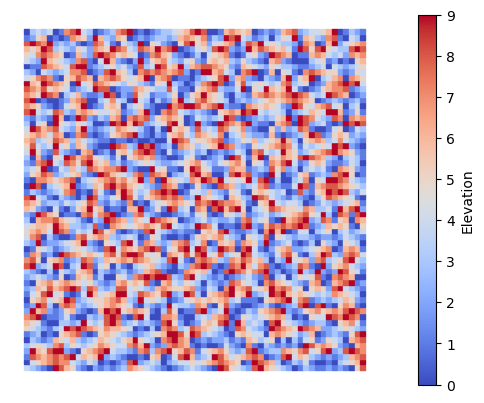

In [108]:
def plot_topo(topo: Grid):
    """Show the map with a colormap from blue to red."""
    plt.figure()
    scatter = plt.scatter(Xs(topo), Ys(topo), c=list(topo.values()), 
                          cmap='coolwarm', marker='s', s=12)
    plt.colorbar(scatter, label='Elevation')
    plt.axis('square')
    plt.axis('off')

plot_topo(topo)

# [Day 11](https://adventofcode.com/2024/day/11): Plutonian Pebbles

Today's narrative involves a straight line of stones, each of which has a number enscribed on it. The input is a single line of these numbers:

In [110]:
stones = the(parse(11, ints))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str:
────────────────────────────────────────────────────────────────────────────────────────────────────
0 27 5409930 828979 4471 3 68524 170
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1 tuple:
────────────────────────────────────────────────────────────────────────────────────────────────────
(0, 27, 5409930, 828979, 4471, 3, 68524, 170)


### Part 1: How many stones will you have after blinking 25 times?

Every time you **blink**, the stones appear to change, according to these rules:
- A stone marked 0 changes to 1.
- Otherwise, a stone with an even number of digits splits into two stones, with the first and second halves of those digits.
- Otherwise, the stone's number is multiplied by 2024.

<img src="https://pbs.twimg.com/media/GejUQBgWIAAUtDf?format=jpg&name=medium" width=400>


I'll define `blink` to simulate the effect of a given number of blinks, and `change_stone` to change a single stone, returning a list of either one or two stones (the two stones computed by `split_stone`):

In [112]:
def blink(stones: Ints, blinks=25) -> List[int]:
    """Simulate the changes in the list of stones after blinking `blinks` times."""
    for _ in range(blinks):
        stones = append(map(change_stone, stones))
    return stones
    
def change_stone(stone: int) -> List[int]:
    """Change a single stone into one or two, according to the rules."""
    digits = str(stone)
    return ([1]                 if stone == 0           else
            split_stone(digits) if len(digits) % 2 == 0 else
            [stone * 2024])

def split_stone(digits: str) -> List[int]:
    """Split a stone into two halves."""
    half = len(digits) // 2
    return [int(digits[:half]), int(digits[half:])]

In [113]:
answer(11.1, 194482, lambda:
       len(blink(stones, 25)))

Puzzle 11.1:   .066 seconds, answer 194482            ok

### Part 2: How many stones would you have after blinking a total of 75 times?

It looks like the number of stones is roughly doubling every 1 or 2 blinks, so for 75 blinks we could have trillions of stones. I'd like something more efficient. I note that:
- Although the puzzle makes it clear that the stones are in a line, it turns out their position in the line is irrelevant.
- Because all the even-digit numbers get split in half, it seems like many small numbers will appear multiple times.
  - (In the given example, after 6 blinks the number 2 appears 4 times.)
- Therefore, I'll keep a `Counter` of stones rather than a `list` of stones.

In [115]:
def blink2(stones: Ints, blinks=25) -> Counter:
    """Simulate the changes after blinking `blinks` times and return a Counter of stones."""
    counts = Counter(stones)
    for _ in range(blinks):
        counts = accumulate((s, counts[stone]) 
                            for stone in counts 
                            for s in change_stone(stone))
    return counts

Now we can re-run Part 1 (it should be slightly faster), and run Part 2 without fear of having trillion-element lists:

In [117]:
answer(11.1, 194482, lambda:
       total(blink2(stones, 25)))

Puzzle 11.1:   .001 seconds, answer 194482            ok

In [118]:
answer(11.2, 232454623677743, lambda:
       total(blink2(stones, 75)))

Puzzle 11.2:   .061 seconds, answer 232454623677743   ok

I'm glad I used the `Counter`; it would have taken a petabyte of storage (and a long, long time) to represent that many stones as a list.

Again, I did pretty well, with no errors, and moving at what I thought was a good pace, but I didn't even crack the top 2000 on the leaderboard. 

# [Day 12](https://adventofcode.com/2024/day/12): Garden Groups

Today's input is yet another 2D map. This one depicts different garden plots on a farm, each plot planted with a crop, indicated by a letter. Perhaps "I" is iceberg lettuce and "O" is okra, and so on.

In [121]:
farm = Grid(parse(12))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 140 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
IIIIIIIIIIIIIIIIIIIIIUUUUUUUUJLLLLAAAAAAMMMAUUUUPPXPZZZZZZZZZZZXXXXXXXXXXXXXXXXXXXXXFFFFFFFFFFZZ ...
IIIIIIIIIIIIIIIIIIIIUUUUUUUUUJALEAAAAAAAAAAAAUUUUPXPPZZZZZHHHHHHXHXXXXXXXXXXXXXXXXXXFXFFFFFFFFZZ ...
IIIIIIIIIIIIIIIIIIIIUUUUUUUUUJAAAAAAAAAAAAAAUUPPPPPPPZZZZZZZHHHHHHHXXXXXXXXXXXXXXXXXXXFFFFFFFFFZ ...
IIIIIIIIIIIAAIIIIIIIIIUUUUUUUJJAAAAAAAAAAAAAAVVPPPPPPPPZHHHHHHHHHHHXXXXXXXXXXXXXXXXXFFFFFFFFFFFZ ...
IOOIIIIIIIIAAIIIIIIIIIIUUUQVUJJAAAAAAAAAAAAAEVVZPPPPPPPHHHHHHHHHHHHXXXXXXXXXXXXXXXXXXXXFFFFFFLLL ...
OOOOOOOOIIAAAAAIIIIIIIIUQQQQVQJAAAAAAAAAAAAAAVVPPPPPIIHHHHHHHHHHHHHXXXXXUXXXXXXUUXXBBBSFFFLLLLLL ...
OOOOOOOOIAAAAAAIIIIIIQQQQQQQQQQQEADDAAAAAAAAHHVVPPPIIIIHHHHHHHHHHHHHXXXUUUUUXXUUUXXBBBSFFFLLELLL ...
OOOOOOOOIIIAAIIIIIQQQQQQQQQQTQJQEEDDDAAAAAAHHVVVVPIIIIIHHHHHHHHHHH

### Part 1: What is the total price of fencing all regions on your map?

We are asked to calculate the cost of putting fences around each **region** (a region is a set of garden plots with the same crop that abut each other horizontally or vertically). The price of the fence for a region is defined as the product of the region's area and its perimeter. If we represent a region as a set of (x, y) points, then the area is easy: it is just the number of points. The perimeter length can be computed by, for each plot point in the region, looking at each of the four directions and counting cases where the adjacent plot in that direction is *not* in the region. (Initially I had a **bug** in that I looked at the `farm.neighbors` of each plot. That doesn't work because a plot on the edge of the grid should count as part of the perimeter, so we have to explicitly check all four directions.)

In [123]:
Region = Set[Point]
region_area = len

def fence_price(farm: Grid) -> int:
    """Total price of fences for all the regions in the farm."""
    return sum(map(region_price, all_regions(farm)))

def region_price(region) -> int: return region_area(region) * perimeter_length(region)

def perimeter_length(region: Region) -> int:
    """The number of sides on the perimeter of the region: 
    ones where the adjacent position in some direction is not in the region."""
    return quantify(add(plot, d) not in region 
                    for plot in region for d in directions4)

To find all the regions I'll start at a point and do a [flood fill](https://en.wikipedia.org/wiki/Flood_fill) to neighboring points with the same region letter, keeping track of points that have already been found so as to not duplicate them. The function `all_regions` iterates over all points to make sure it finds every region, and `flood_fill` recursively expands to all points that neighbor `p` and have the same crop (letter). `flood_fill` mutates the set `already_found` as it goes (and also mutates the `region` it is building up).

In [125]:
def all_regions(farm: Grid) -> List[Region]:
    """Find all the regions in the farm."""
    already_found = set() # Set of plots already accounted for
    return [flood_fill(p, farm, set(), already_found) 
            for p in farm if p not in already_found]

def flood_fill(p: Point, grid: Grid, region: set, already_found: set) -> set:
    """Starting at point p, recursively add all neighboring points to `region`, keeping track of `already_found`."""
    if p not in already_found:
        region.add(p)
        already_found.add(p)
        for p2 in grid.neighbors(p):
            if farm[p2] == farm[p]:
                flood_fill(p2, grid, region, already_found)
    return region

In [126]:
answer(12.1, 1402544, lambda:
       fence_price(farm))

Puzzle 12.1:   .033 seconds, answer 1402544           ok

### Part 2: What is the new total price of fencing all regions on your map, with the bulk discount?

In Part 2 we get a **bulk discount** on the fencing; we only need to pay for the number of straight line sides on the perimeter, not the total length of the perimeter. For example, a 10 x 10 square has perimeter 40, but has only 4 sides. That's a 90% discount!

It took me a while to figure out a good approach for this. At first I was reminded of the Convex Hull problem, for which I have [a notebook](https://github.com/norvig/pytudes/blob/main/ipynb/Convex%20Hull.ipynb). But that's not really appropriate here; our regions could be non-convex, and the set of sides in a region are not the same as the vertexes of a polygon (e.g., a region with one point has 4 sides, not 0).

A better idea is to start with the perimeter length and subtract one for every case in which a points has an edge in one direction (e.g., an edge to the North) and also has a neighbor with the same edge. To be precise, I'll look for four cases:
- A point with an edge to the North whose neighbor to the East also has an edge to the North
- A point with an edge to the East whose neighbor to the South also has an edge to the East
- A point with an edge to the South whose neighbor to the West also has an edge to the South
- A point with an edge to the West whose neighbor to the North also has an edge to the West

Here are two diagrams of two regions with two kinds of crop, "`X`" and "`W`", with a "`-`" marking each place where a perimeter piece would be subtracted.

     .X-...    .-------..
     -X-.X-    .WWWWWWWW-
     -XXXX-    -WWWWWWWW-
     ..XXX.    -WWWWWWWW.
     ...--.    ..-------.

I'll refactor `fence_price` to take a `region_price` parameter, and show that the change is backwards compatible to Part 1:

In [128]:
def fence_price(farm: Grid, region_price=region_price) -> int:
    """Total price of fences for all the regions in the farm, given the price function for a region."""
    return sum(map(region_price, all_regions(farm)))

def discount_region_price(region) -> int: return region_area(region) * region_sides(region)
    
def region_sides(region):
    """How many straight-line sides does this region have?"""
    def has_edge(p: Point, d: Vector): return p in region and add(p, d) not in region
    def neighbor(p: Point, d: Vector): return add(p, make_turn(d, 'R'))
    subtract = quantify(has_edge(p, d) and has_edge(neighbor(p, d), d)
                        for p in region
                        for d in directions4)
    return perimeter_length(region) - subtract

In [129]:
answer(12.1, 1402544, lambda:
       fence_price(farm))

Puzzle 12.1:   .030 seconds, answer 1402544           ok

In [130]:
answer(12.2, 862486, lambda: 
       fence_price(farm, discount_region_price))

Puzzle 12.2:   .061 seconds, answer 862486            ok

# [Day 13](https://adventofcode.com/2024/day/13): Claw Contraption

Today's puzzle involves arcade claw machines. Each input paragraph describes a machine with two buttons, **A** and **B**; every push of a button moves the claw a specified amount in the X and Y directions. The prize is at a specified location. We can parse the input by defining a `parse_claw` function and a `Claw` datatype to represent a claw machine.

<img src="https://files.mastodon.social/media_attachments/files/113/647/741/325/081/329/small/30d98922146765ad.jpg" width=400>

In [132]:
Claw = namedtuple('Claw', 'A, B, Prize') # A claw machine

def parse_claw(text: str) -> Claw:
    """Parse a description into a Claw object."""
    ax, ay, bx, by, px, py = ints(text)
    return Claw((ax, ay), (bx, by), (px, py))
    
claws = parse(13, parse_claw, sections=paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1279 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
Button A: X+24, Y+19
Button B: X+32, Y+86
Prize: X=1072, Y=2062

Button A: X+70, Y+12
Button B: X+11, Y+43
Prize: X=3400, Y=3872

...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 320 Claws:
────────────────────────────────────────────────────────────────────────────────────────────────────
Claw(A=(24, 19), B=(32, 86), Prize=(1072, 2062))
Claw(A=(70, 12), B=(11, 43), Prize=(3400, 3872))
Claw(A=(48, 77), B=(34, 12), Prize=(6510, 1583))
Claw(A=(76, 60), B=(29, 88), Prize=(5506, 6300))
Claw(A=(16, 75), B=(68, 20), Prize=(17148, 13490))
Claw(A=(46, 13), B=(33, 63), Prize=(15572, 9644))
Claw(A=(21, 79), B=(44, 32), Prize=(2433, 5147))
Claw(A=(13, 45), B=(36, 11), Prize=(4612, 19164))
...


### Part 1: What is the fewest tokens you would have to spend to win all possible prizes?

We are told that for some machines it is possible to reach the prize and others it is impossible. We are also told that you need to spend 3 tokens to  press  the **A** button and 1 token to press the **B** button. There is a hint that no button will need to be pushed more than 100 times. It is usually a good idea to accept the hint, so I will  do the following:
- Exhaustively try every number from 0 to 100 presses of the **A** button.
- For each number, figure out what the resulting position of the claw would be after those presses.
- Calculate how many presses of the **B** button would be required to get to the prize's X location.
- If the number of presses is an integer, and would also arrive at the prize's Y location, then yield that solution.
- Out of these solutions, the cheapest solution is  the one that needs the fewest tokens.
- (If there are no solutions, `cheapest_solution` will return 0, whcih is convenient for adding the results up, but is worrisome because it doesn't distinguish between an impossible-to-reach prize and a prize at the origin. On this puzzle, that's ok, but it is still worrisome.)

In [134]:
def solve_claw(claw: Claw, limit=100) -> Iterable[Tuple[int, int]]:
    """All possible (A-presses, B-presses) solutions to reach the prize on this machine."""
    A, B, Prize = claw
    for Apresses in range(limit + 1):
        pos = mul(A, Apresses)
        if X_(pos) > X_(Prize) or Y_(pos) > Y_(Prize):
            return
        diff = sub(Prize, pos)
        Bpresses = X_(diff) / X_(B)
        if Bpresses.is_integer() and Bpresses * Y_(B) == Y_(diff):
            yield (Apresses, int(Bpresses))

def cheapest_solution(claw: Claw) -> int: 
    """The minimum cost out of every possible solution to this claw machine."""
    return min((3 * A + B for (A, B) in solve_claw(claw)), default=0)

In [135]:
answer(13.1, 29598, lambda:
       sum(map(cheapest_solution, claws)))

Puzzle 13.1:   .006 seconds, answer 29598             ok

### Part 2: Using the corrected prize coordinates, what is the fewest tokens you would have to spend to win all possible prizes?

In Part 2, we discover that "due to a unit conversion error" the prize is actually much farther away, by 10,000,000,000,000 (ten trillion) steps in both the X and Y coordinates. Theoretically, we could still use `solve_claw` with a bigger `limit`, but that would take a *long* time.
w
Instead I can solve each claw machine *mathematically* rather than by trial and error. It looks like each claw machine defines two equations;  what exactly are the equations? For my first claw machine, 

     Button A: X+24, Y+19
     Button B: X+32, Y+86
     Prize: X=1072, Y=2062

there are two linear equations to solve simultaneously, over the integers:

     24 A + 32 B = 1072
     19 A + 86 B = 2062

I know that an equation over the integers is called a [Diophantine equation](https://en.wikipedia.org/wiki/Diophantine_equation), but I don't remember much about them, and furthermore it seems like it is more important that we are dealing with lines than that they need integer solutions. In general, two linear equations in two unknowns can have zero solutions (if the lines are parallel), an infinite number of solutions (if the lines are the same), or exactly one solution (in the "normal" case). We can solve the linear equations, and then discard the answer if *A* and *B* are not integers. 

I defined `solve_claw` to yield multiple solutions, but let's see how many solutions each claw machine yields:

In [137]:
Counter(quantify(solve_claw(c)) for c in claws)

Counter({0: 168, 1: 152})

This says that 168 claw machines have no solution and 152 have exactly one. None of them have more than one solution.

So, what is the intersection point of two lines? You could [look it up](https://www.wolframalpha.com/input?i=solve+for+a%2C+b%3A+p+*+a+%2B+q+*+b+%3D+r++and+++s+*+a+%2B+t+*+b+%3D+u) or work it out by hand, or [call a library function](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html). Given the two equations over the variables *a* and *b*:

    p * a + q * b = r
    s * a + t * b = u

The solution is:

    a = (r * t - q * u) / (p * t - q * s)
    b = (r * s - p * u) / (q * s - p * t)

So we can rewrite `solve_claw` to use this:

In [139]:
def solve_claw(claw: Claw) -> Iterable[Tuple[int, int]]:
    """All possible (A-presses, B-presses) solutions to reach the prize on this machine."""
    ((p, s), (q, t), (r, u)) = claw
    a = (r * t - q * u) / (p * t - q * s)
    b = (r * s - p * u) / (q * s - p * t)
    if a.is_integer() and b.is_integer():
        yield (int(a), int(b))

This raises an interesting design point: If you have a function that might return zero or one result of type `T`, should you define the return type as `Optional[T]` or as `Iterable[T]`, where it can yield zero or one result? I guess it depends on the expected use cases of the function.

We'll need a way to move the prizes further away, then we're ready to answer Part 2:

In [141]:
def move_prizes(claws, delta=(10**13, 10**13)) -> List[Claw]:
    """Move each claw's prize by the given displacement, delta."""
    return [claw._replace(Prize=(add(claw.Prize, delta))) for claw in claws]

In [142]:
answer(13.2, 93217456941970, lambda:
       sum(map(cheapest_solution, move_prizes(claws))))

Puzzle 13.2:   .000 seconds, answer 93217456941970    ok

The refactored `solve_claw` is compatible with Part 1, and should be  faster:

In [144]:
answer(13.1, 29598, lambda:
       sum(map(cheapest_solution, claws)))

Puzzle 13.1:   .000 seconds, answer 29598             ok

I could have recognized in Part 1 that we have a system of two linear equations in two unknowns, and implemented the Part 2 solution. But I have no regrets; I took the hint that trial-and-test for 100 trials was a good idea, and I saved the complicated algebra for when I really needed it in Part 2. Having two independent implementations that produce the same answer increases my confidence in both of them.

# [Day 14](https://adventofcode.com/2024/day/14 ): Restroom Redoubt

Today's narratives involve multiple robots roaming around a restroom. Each line of the input describes a robot's position and velocity in two dimensions:

In [147]:
robots = parse(14, ints) 

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 500 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
p=62,20 v=85,-14
p=88,18 v=-70,97
p=51,21 v=35,-22
p=19,56 v=2,45
p=93,11 v=-87,26
p=90,67 v=44,-13
p=99,34 v=82,57
p=55,42 v=82,22
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 500 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(62, 20, 85, -14)
(88, 18, -70, 97)
(51, 21, 35, -22)
(19, 56, 2, 45)
(93, 11, -87, 26)
(90, 67, 44, -13)
(99, 34, 82, 57)
(55, 42, 82, 22)
...


### Part 1: What will the safety factor be after exactly 100 seconds have elapsed?

Each second the  robots move according to their velocity, and they wrap around when they reach the edge of their world, which has width 101 and height 103. They never collide; they can pass right through each other. We're asked to figure out where they are after 100 seconds. I can see that it is not necessary to simulate the robots movements time step by time step; we can just multiply their velocity by time, add it to their initial position, and then take the result modulo the width or height. That's done in `robot_dance`. 

We're asked to figure out how many robots end up in each **quadrant**. There are four quadrants, but a robot that is exactly on a middle line, either horizontally or vertically, doesn't count in any quadrant. Finally, the **safety factor** is the product of the four counts of robots in each quadrant.

In [149]:
def robot_dance(robots, steps=100, width=101, height=103) -> List[Point]:
    """Move each robot for `steps` number of steps."""
    return [((x + steps * dx) % width, (y + steps * dy) % height)
            for (x, y, dx, dy) in robots]

def quadrant_counts(positions, w=101//2, h=103//2) -> Counter:
    """How many robots are in each quadrant? Ignore robots exactly in the middle."""
    return Counter((sign(x - w), sign(y - h)) 
                   for (x, y) in positions if x != w and y != h)

def safety_factor(robots) -> int:
    """The product of the four counts of robots in each quadrant."""
    return prod(quadrant_counts(robot_dance(robots)).values())

In [150]:
answer(14.1, 216027840, lambda:
       safety_factor(robots))

Puzzle 14.1:   .000 seconds, answer 216027840         ok

In case you're curious, here are the quadrant counts after 100 steps:

In [152]:
quadrant_counts(robot_dance(robots))

Counter({(1, 1): 124, (-1, 1): 122, (-1, -1): 120, (1, -1): 119})

### Part 2: What is the fewest number of seconds that must elapse for the robots to display a picture of a Christmas Tree?

I was **so** sure that Part 2 was going to ask for 10 trillion steps, and I was going to be **so** clever for not simulating step-by-step. But I was wrong. 

Instead we have the very vague task of discovering when a picture emerges. There is a hint that "*very rarely, most of the robots should arrange themselves into a picture of a Christmas tree.*" Since I don't know exactly how to specify a picture of a Christmas tree, I see three options:
1) I could build an animation, and watch as each frame is displayed, stopping when I see something that looks like a tree.
2) The phrase "*most of the robots should arrange themselves*" suggests that most of the robots are in one area. I could check for that.
3) I could generate an image for each time step and send it off to an AI image recognition service. That would be iffy, slow, and probably expensive. 

I'll try the animation approach first. Google and Stack Overflow led me to the `matplotlib.animation.FuncAnimation` function:

In [154]:
import matplotlib.animation

def animate_robots(robots, times: Ints):
    """Animate the robot dance over the given time steps."""
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 100  
    plt.ioff()
    fig, ax = plt.subplots()
    def animate(t: int):
        points = robot_dance(robots, t)
        plt.cla()
        ax.yaxis.set_inverted(True)
        plt.plot(*T(points), 'go')
        plt.title(f'{t} seconds')
    return matplotlib.animation.FuncAnimation(fig, animate, frames=times)

Here's what it looks like:

In [156]:
animate_robots(robots, range(3))

The animations take up a lot of space in the stored `.ipynb` file, so I only show 3 frames here. I looked at hundreds of frames, but no Christmas tree emerged. 

So, on to the second idea. If the hint had mentioned "*all of the robots*", I would look for an image frame with the minimum bounding box. But for "*most of the robots*," I'll look for a frame that minimizes the mean distance from the centroid.  

In [158]:
def mean_distance_to_centroid(points, distance=taxi_distance) -> float:
    """The mean of each point's distance to the centroid."""
    centroid = (mean(Xs(points)), mean(Ys(points)))
    return mean(distance(p, centroid) for p in points)

def most_clustered_time(robots, times=range(10_000)) -> int:
    """Out of all the given time steps, the one that has the robots clustered closest together."""
    return min(times, key=lambda t: mean_distance_to_centroid(robot_dance(robots, t)))

In [159]:
t = most_clustered_time(robots)
animate_robots(robots, [t])

**It worked!** 

(At first I had a **bug**: the Christmas tree was upside down, because my Y-axis was upside down. So I added the `yaxis.set_inverted` call to `animate_robots`.)

Although there was a human in the loop to verify the output, I can make this official with this call to `answer`:

In [161]:
answer(14.2, 6876, lambda:
       most_clustered_time(robots, range(7000)))

Puzzle 14.2:  1.874 seconds, answer 6876              ok

# [Day 15](https://adventofcode.com/2024/day/15): Warehouse Woes

Today's input is in two sections: the first section is a grid map describing a warehouse with walls (`#`) and boxes (`O`) and a single robot (`@`). The second part is a set of instructions for how the robot moves (arrows). I'll parse the two sections as paragraphs, then parse each paragraph:

In [163]:
warehouse_woes = parse(15, sections=paragraphs)
warehouse = Grid(parse(warehouse_woes[0]))
arrows    = cat(parse(warehouse_woes[1]))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 71 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
##################################################
#..OO..O.O....O...O..O...O.......O...OO##....O.OO#
#O.#..#OOO#..O..OO...O.O.....OO..O#O#.OOO.....#..#
#.....O.......OO.#OO....#O.OO.O..OO.O.O.O..##....#
#.O....O...O#...#...OO..#..O........#O..#..O..O..#
#O....O...O.O..OO..OO..#OO.#OO.O......##..O..O...#
#..O.##..#O...O...#.#.O.O..O.#......O..#.#...O...#
#O.O.........O..O........OO....OO......O.....O#..#
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
##################################################
#..OO..O.O....O...O..O...O.......O...OO##.... ...
>><^v><>^v<<vv<>vv><v><<^^>

### Part 1: What is the sum of all boxes' GPS coordinates after moving?

The robot attempts to follow each instruction arrow (for example, moving East when the arrow is `>`). The robot is strong enough to push a line of any number of boxes sitting in front of it; that's its job. However, if a push is blocked by a wall, then neither the robot nor any boxes will move.

The **GPS coordinate** of a box at (*x*, *y*) is defined to be *x* + 100*y*.

I'll implement `obey_arrows` to make the arrow moves on a copy of the warehouse. For each arrow the function finds all the things that might move (the robot and any boxes) with `moveables`; then `make_movement` checks if they would bump into a wall, and if not, they all move.

In [165]:
def gps_coordinate(box: Point) -> int: return X_(box) + 100 * Y_(box)

def obey_arrows(warehouse: Grid, arrows: str) -> Grid:
    """Return a grid in which the robot has followed `arrows`, pushing boxes around."""
    grid = warehouse.copy()
    robot_pos = the(grid.findall('@'))
    for arrow in arrows:
        dir = arrow_direction[arrow]
        robot_and_boxes = moveables(grid, robot_pos, dir)
        if make_movement(grid, robot_and_boxes, dir):
            robot_pos = add(robot_pos, dir)
    return grid

def all_box_positions(grid) -> List[Point]: return grid.findall('O')

def moveables(grid, start: Point, dir: Vector) -> List[Point]:
    """The positions of moveable things (the robot and maybe boxes) going in direction `dir` from the `start`."""
    def moveable(pos): return grid[pos] in ('@', 'O')
    return list(takewhile(moveable, grid.follow_line(start, dir)))

def make_movement(grid, to_move: List[Point], dir: Vector) -> bool:
    """Try to move the objects in the `to_move` positions in direction `dir`; return True if they move."""
    def destination(p): return add(p, dir) # Where we are trying to move `p` to
    if grid[destination(to_move[-1])] == '#':
        return False
    else:
        for p in reversed(to_move): # Reverse order so they don't step on each other
            grid[destination(p)] = grid[p]
            grid[p] = '.'
        return True

In [166]:
answer(15.1, 1563092, lambda:
       sum(map(gps_coordinate, all_box_positions(obey_arrows(warehouse, arrows)))))

Puzzle 15.1:   .026 seconds, answer 1563092           ok

### Part 2: What is the sum of all boxes' final GPS coordinates on the double-wide grid?

In Part 2, there is another warehouse that is similar to the first, but twice as wide. Each position in the original warehouse is replaced by *two* copies of the contents, except that the robot is replaced by `@.` and a box, `O`, is replaced by `[]`, indicating the two halves of a double-wide box. The rules for movement and pushing are the same, except that when the robot is moving North or South and is pushing a box, that box, since it is two positions wide, can push *two* boxes if they are lined up right. (Presumably, those two boxes could then push three boxes in the next row, and so on, although the puzzle description did not explicitly specify that). Finally, the GPS coordinates are taken for the `[` part of the box. Here's what it looks like before and after the robot moves "^":

        ##############        ##############
        ##......##..##        ##......##..##
        ##..........##        ##...[][]...##
        ##...[][]...##        ##....[]....##
        ##....[]....##        ##.....@....##
        ##.....@....##        ##..........##
        ##############        ##############

So this is mostly the same as Part 1, but the criteria of what to move is different. Here are the changes I'll make:
- I'll need to make the double-wide grid, by applying `doublewide` to the original text to get `warehouse2`.
- I'll redefine `make_movement` to check for a wall in front of *any* of the boxes, not just the last one, and to move them all in one `update`, rather than one at a time.
- I'll redefine `moveables` to deal with either regular or double-wide boxes (but not both in one maze).

The redefinitions are backwards-comnpatible, which I'll demonstrate by re-running Part 1 before running Part 2:

In [168]:
def doublewide(text: str) -> str:
    """Make the grid (described in text) twice as wide."""
    return text.replace('#', '##').replace('O', '[]').replace('.', '..').replace('@', '@.')
    
warehouse2 = Grid(parse(doublewide(warehouse_woes[0])))

def make_movement(grid, to_move: Collection[Point], dir: Vector) -> bool:
    """Try to move the objects in the `to_move` positions in direction `dir`; return True if they move."""
    def destination(p): return add(p, dir) # Where we are trying to move `p` to
    if any(grid[destination(p)] == '#' for p in to_move):
        return False
    else:
        updates = {destination(p): grid[p] for p in to_move}
        grid.update({p: '.' for p in to_move})
        grid.update(updates)
        return True

def moveables(grid, start_pos, dir) -> Set[Point]:
    """The positions of moveable things (robot and maybe boxes) going in direction from the start.""" 
    ahead = add(start_pos, dir)
    if dir in (East, West) or grid[ahead] == 'O': # Single line push
        def moveable(pos): return grid[pos] in ('@', 'O', '[', ']')
        return set(takewhile(moveable, grid.follow_line(start_pos, dir)))
    else: # Potential non-linear push
        results = {start_pos}
        if grid[ahead] in ('[', ']'): results |= moveables(grid, ahead, dir) 
        if grid[ahead] == '[':        results |= moveables(grid, add(ahead, East), dir)
        if grid[ahead] == ']':        results |= moveables(grid, add(ahead, West), dir)
        return results

In [169]:
answer(15.1, 1563092, lambda:
       sum(map(gps_coordinate, obey_arrows(warehouse, arrows).findall('O'))))

Puzzle 15.1:   .029 seconds, answer 1563092           ok

In [170]:
answer(15.2, 1582688, lambda:
       sum(map(gps_coordinate, obey_arrows(warehouse2, arrows).findall('['))))

Puzzle 15.2:   .042 seconds, answer 1582688           ok

I had a frustrating time **debugging** this one; this was by far my worst performance on this year's puizzles so far. First I had a silly typo in `moveables`; I was able to fix it after looking at the results on the smaller test puzzle:

In [172]:
xwarehouse = Grid(parse(doublewide("""\
#######
#...#.#
#.....#
#..OO@#
#..O..#
#.....#
#######""")))

xarrows = "<vv<<^^<<^^"

obey_arrows(xwarehouse, xarrows).print()

##############
##...[].##..##
##...@.[]...##
##....[]....##
##..........##
##..........##
##############


Once I found my first bug and got this correct final grid, I couldn't see what I had done wrong. It turns out that I had all the movements correct, but my **bug** was summing the GPS coordinates of *both* sides of the boxes when I should have been using just the *left* sides. Lesson learned: read the instructions carefully!

# [Day 16](https://adventofcode.com/2024/day/16): Reindeer Maze

Today's input is yet another 2D grid, this one a maze that reindeer race through:

In [175]:
maze = Grid(parse(16))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 141 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
################################################################################################ ...
#.................#.................#.............#.......#...................#.......#......... ...
#.#.###############.#####.#####.###.#.#########.###.#.###.#.#################.#.#####.#.#.#####. ...
#.#.#.....#.........#...#.#...#.#.#.#.........#.....#.#...#.....#...#.........#.#.......#.#..... ...
###.#.###.#.#########.#.###.#.#.#.#.###.#############.#.###.###.#.###.#########.#.#####.#.###### ...
#...#...#...#...#...#.#.#...#...#.....#.#...#.........#...#...#.#.#...#.......#.#...#.....#..... ...
#.#####.#####.###.#.#.#.#.###.#######.###.#.#.###########.#####.#.#.###.#####.#.###.#.#.###.#### ...
#.......#...#...#.#.#.#...#...#...#...............................

<img src="https://files.mastodon.social/media_attachments/files/113/665/139/461/284/421/small/fbe45a948b982c5a.jpg" width=400>



### Part 1: What is the lowest score a Reindeer could possibly get?

The race through the maze starts at the `S` position and ends at the `E`.  A reindeer is allowed to take a step forward (as long as there isn't a `#` wall there) or to turn 90 degrees right or left. The reindeer is initially facing East.  The **score** for a path is one point for every forward step and 1000 points for every turn.

We're asked to find the path with the minimum score. My [AdventUtils](AdventUtils.ipynb) notebook already contains an `A_star_search` function for finding least-cost paths, and a `GridProblem` class. By default, a `GridProblem` counts one point for a move in any direction, so we'll have to create a subclass, `MazeSearchProblem`. This is straightforward but a bit tedious; I had a **bug** where I accepted the default `is_goal` and `h` methods; that doesn't work because they assume the state is just a position; but for this problem the state contains both the position and the facing direction. Another **bug** was that I left out the `goal=end` in the call to `MazeSearchProblem`. I thought I wouldn't need it because I wrote an `is_goal` method, but the `goal` is needed in the `h` (heuristic estimate) method.

In [177]:
State = namedtuple('State', 'pos, facing')

def reindeer_path(maze) -> Node:
    """The lowest-cost path through the maze."""
    start, end = the(maze.findall('S')), the(maze.findall('E'))
    problem = MazeSearchProblem(grid=maze, initial=State(start, East), goal=end)
    return A_star_search(problem)

class MazeSearchProblem(GridProblem):
    """A GridProblem where a turn costs 1000 points, a step ahead 1."""
    
    def actions(self, state):
        ahead = add(state.pos, state.facing)
        return ['L', 'R'] + ([ahead] if self.grid[ahead] != '#' else [])
                
    def result(self, state, action) -> State:
        return (State(state.pos, make_turn(state.facing, action))   if action in ('L', 'R') else
                State(add(state.pos, state.facing), state.facing))
            
    def action_cost(self, s1, action, s2) -> int: return 1000 if action in ('L', 'R') else 1

    def is_goal(self, state) -> bool: return self.grid[state.pos] == 'E'

    def h(self, node) -> int: return taxi_distance(node.state.pos, self.goal)

In [178]:
answer(16.1, 103512, lambda:
       reindeer_path(maze).path_cost)

Puzzle 16.1:   .146 seconds, answer 103512            ok

### Part 2: How many tiles are part of at least one of the best paths through the maze?

In Part 2 we're asked to find the total number of positions that are part of *any* best path from start to end. I'll write a new version of `best_first_search` to return all the paths that have the same cost as the best path. I thought this would be easy, but I had **another bug** where I forgot to change the `<` to a `<=` in the fourth-to-last line of `all_paths_best_first_search`:

In [180]:
def reindeer_best_positions(maze) -> Node:
    """All the positions on any best path from start to end."""
    start, end = the(maze.findall('S')), the(maze.findall('E'))
    problem = MazeSearchProblem(grid=maze, initial=State(start, East), goal=end)
    paths = list(all_paths_best_first_search(problem, f=lambda n: n.path_cost + problem.h(n)))
    return union({state.pos for state in path_states(path)} for path in paths)

def all_paths_best_first_search(problem, f) -> List[Node]:
    "Search nodes with minimum f(node) value first, return all paths with minimum cost."
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        node = frontier.pop()
        if problem.is_goal(node.state):
            return [node] + [path for (cost, path) in frontier.items
                             if cost == node.path_cost and problem.is_goal(path.state)]
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost <= reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return []

In [181]:
answer(16.2, 554, lambda:
    len(reindeer_best_positions(maze)))

Puzzle 16.2:   .863 seconds, answer 554               ok

Time to do another cleanup:

In [183]:
disk_map = topo = farm = claws = robots = warehouse_woes = warehouse = arrows = maze = None

# [Day 17](https://adventofcode.com/2024/day/17): Chronospatial Computer

Today we have to help debug a faulty computer. This particular computer has three registers, A, B, and C, and a program consisting of a sequence of octal digits. The input is a description of the state of the computer; the values in the register and the stored program.

In [185]:
Computer = namedtuple('Computer', 'A, B, C, prog')
    
def initialize_computer(information) -> Computer:
    """Initialize the computer with the debugging information."""
    kwds = {}
    for info in information:
        match info:
            case ['Register', L, val]: kwds[L] = val
            case ['Program', *vals]:   kwds['prog'] = vals
    return Computer(**kwds)
    
computer = initialize_computer(parse(17, atoms))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 5 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
Register A: 52042868
Register B: 0
Register C: 0

Program: 2,4,1,7,7,5,0,3,4,4,1,7,5,5,3,0
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 5 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('Register', 'A', 52042868)
('Register', 'B', 0)
('Register', 'C', 0)
()
('Program', 2, 4, 1, 7, 7, 5, 0, 3, 4, 4, 1, 7, 5, 5, 3, 0)


In [186]:
computer

Computer(A=52042868, B=0, C=0, prog=[2, 4, 1, 7, 7, 5, 0, 3, 4, 4, 1, 7, 5, 5, 3, 0])

### Part 1: Run the Program. What do you get if you use commas to join the output values?

Now we have to run the program. The computer has eight opcodes; each opcode operates on the following value in memory; some instructions take the operand literally, and some compute a **combo value** from it.  The combo value is the same as the literal value, except that values 4, 5, and  6 refer to registers A, B, and C, respectively. Opcode 5 outputs (yields) the last octal digit of the combo value. There is a program counter (pc) that increments by 2 on each instruction (to skip over the operand) unless there is a branch instuction (opcode 3). See the [day's description](https://adventofcode.com/2024/day/17) for details on how the opcodes work.

In [188]:
def run_program(computer) -> Iterable[int]:
    """Run the program on the computer, yielding each output."""
    A, B, C, prog = computer
    pc = 0
    while pc < len(prog):
        op, val = prog[pc:pc+2]
        pc += 2
        combo = (A if val == 4 else B if val == 5 else C if val == 6 else val)
        match op:
            case 0: A = A // (2 ** combo)
            case 6: B = A // (2 ** combo)
            case 7: C = A // (2 ** combo)
            case 1: B = B ^ val
            case 4: B = B ^ C
            case 2: B = combo % 8
            case 5: yield combo % 8
            case 3: 
                if A: pc = val

With my `run_program` function, the answer for Part 1 is easy:

In [190]:
answer(17.1, '2,1,0,1,7,2,5,0,3', lambda:
       cat(run_program(computer), ','))

Puzzle 17.1:   .000 seconds, answer 2,1,0,1,7,2,5,0,3 ok

### Part 2: What is the lowest positive initial value for register A that causes the program to output a copy of itself?

In Part 2, we find that register A has been corrupted, and we need to restore it to the value that will make the program output a copy of itself (a [Quine](https://en.wikipedia.org/wiki/Quine_%28computing%29)). I was afraid of this! AoC always has a puzzle where you have to write an interpreter for a program in some obscure language, but then in Part 2 you have to actually *understand* what the program is doing; you can't use brute force. (I tried brute force up to A=10,000,000 with no luck.)

To try to understand my program, here it is in pseudocode:

    top: B = A % 8        # 2, 4
         B = B ^ 7        # 1, 7
         C = A / 2 ** B   # 7, 5
         A = A / 2 ** 3   # 0, 3
         B = B ^ C        # 4, 4
         B = B ^ 7        # 1, 7
         output B         # 5, 5
         if A: goto top   # 3, 0

I can summarize that as:

    top: B and C are defined in terms of the last octal digit of A, and prior value of B
         A is shifted to eliminate the last octal digit
         output B       
         if A: goto top 

So I realized that one octal digit of `A` is eliminated on each pass through the loop, and when `A` hits zero, we exit. Each pass outputs one octal digit, so `A` in octal has to be the same number of digits as my program; 16 octal digits is somewhere in the hundred trillion range. Good thing I gave up on brute force. 

I started playing around and came up with this:

In [192]:
def run(computer=computer, **registers) -> List[int]: 
    """Run the program with registers set as keywords."""
    return list(run_program(computer._replace(**registers)))

In [193]:
computer.prog

[2, 4, 1, 7, 7, 5, 0, 3, 4, 4, 1, 7, 5, 5, 3, 0]

In [194]:
run(A=0o7)   # match the last digit of program

[0]

In [195]:
run(A=0o72)   # match the last two digits of program

[3, 0]

In [196]:
run(A=0o726)   # match the last three digits of program

[5, 3, 0]

In [197]:
run(A=0o7266)   # match the last four digits of program

[5, 5, 3, 0]

That is, I can build up the right value for `A` to generate a Quine program as follows:

- I'm going to keep a **set** of candidate partial values for `A` as the set `As`.
- The set starts with no digits, so just `{0}`.
- On each iteration I try appending each octal digit to each element of the set `As` (by multplying by 8 and adding the digit).
- I keep the candidate `A` values whose output from the run matches the tail of the program's output.
    - On each iteration we insist on matching one more octal digit of the tail of the program 
- Iterate this for each digit in the program and return the set of `A` values that reproduce the whole program.

All of the resulting `A` values will be Quines, but the puzzle asks us to find just the minimum of the set.

In [199]:
def quine(computer) -> Set[int]:
    """Find the values of register `A` that cause the output of the run to match the program."""
    As = {0}
    for place in reversed(range(len(computer.prog))):
        tail = computer.prog[place:]
        candidates = {(A * 8) + d for A in As for d in range(8)}
        As = {A for A in candidates if run(A=A) == tail}
    return As

answer(17.2, 267265166222235, 
       lambda: min(quine(computer)))

Puzzle 17.2:   .004 seconds, answer 267265166222235   ok

# [Day 18](https://adventofcode.com/2024/day/18): RAM Run

In today's narrative, we're inside a computer, on a 2D memory board, and bytes are falling down, at specified (x, y) positions, as given in our input:

In [201]:
falling_bytes = parse(18, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 3450 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
40,65
17,1
34,45
31,51
29,43
25,9
14,27
5,29
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 3450 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(40, 65)
(17, 1)
(34, 45)
(31, 51)
(29, 43)
(25, 9)
(14, 27)
(5, 29)
...


<img src="https://files.mastodon.social/media_attachments/files/113/675/173/635/175/528/small/844f7f437bf670c7.jpg" width=400>

### Part 1: What is the minimum number of steps needed to reach the exit?

When a byte falls it creates a barrier. Our task is to find a path that avoids the barriers, from the start in the upper left to the exit in the lower right of a 71 x 71 grid that is the memory board. 

This is another search puzzle, like the maze in Day 16, but without the complications (e.g. costs for turning right or left), so I can use my `GridProblem` class from [AdventUtils](AdventUtils.ipynb) without alteration. The puzzle description for today says that we should first consider just the first kilobyte (1024 falling bytes), and I was worried that if I just hand those points to my `Grid` class, it wouldn't cover the whole 71 x 71 grid. Therefore, I created a grid with empty spaces, and then updated with the falling bytes. The function `memory_path` returns a path, and we can then ask for its length to get the answer.

In [203]:
def memory_path(falling_bytes: Tuple[Point], width=71, height=71) -> Grid:
    """Make a Grid of the given size with the points as obstacles, and find a path."""
    grid = Grid(['.' * width] * height)
    grid.update({p: '#' for p in falling_bytes})
    problem = GridProblem(grid=grid, initial=(0, 0), goal=(width - 1, height - 1))
    return A_star_search(problem)

In [204]:
answer(18.1, 344, lambda:
       len(memory_path(falling_bytes[:1024])))

Puzzle 18.1:   .014 seconds, answer 344               ok

### Part 2: What are the coordinates of the first byte that will prevent the exit from being reachable from your starting position?

After 1024 bytes fall there is a path from start to exit, but as more bytes fall we might have to switch to a different path, and eventually there will be no path. We're asked for the `(x,y)` position of the first falling byte that blocks off all paths. I can think of two ways to handle this:
1) Add falling bytes one at a time and repeat the A-star search each time. **Slow!**
2) Add falling bytes in **binary search** fashion: We know adding no bytes is **good** for getting a path and adding all of them is **bad**; try half way and then update **good** or **bad** depending on whether we found a path. Repeat until **good** is one more than **bad**; that's the answer.  **Fast!**

In [206]:
def memory_blocker(falling_bytes, good=1024) -> Point:
    """Which falling byte is the first to block a path to the exit? Do binary search."""
    # Here `good` and `bad` are the stop values of a slice, not an index,
    # so the final answer is falling_bytes[bad - 1], not falling_bytes[bad]
    bad  = len(falling_bytes) 
    while bad != good + 1:
        mid = (good + bad) // 2
        if memory_path(falling_bytes[:mid]) == search_failure:
            bad = mid
        else:
            good = mid
    return falling_bytes[bad - 1]

In [207]:
answer(18.2, '46,18', lambda:
       cat(memory_blocker(falling_bytes), ','))

Puzzle 18.2:   .033 seconds, answer 46,18             ok

I admit I initially had an off-by-one **bug** here. I was inconsistent on whether `bad` should be an index into the falling bytes, or the stop of a slice.

I realize that for Part 1 I should have had separate functions for making the grid and solving it; then in Part 2 I could have incrementally modified the grid each time rather than creating a whole new Grid (and Problem). But it runs in under 1/10 second, so it is not worth changing it.

# [Day 19](https://adventofcode.com/2024/day/19): Linen Layout

Today's input is in two sections, the first a list of towel patterns (with each letter of a word specifying a color), and the second a list of desired designs to be made by adjoining towel patterns.  For example, if the patterns include

     a, dub, rub, ...

and the desired design is

     rubadubdub

then it can be made from the patterns with

     rub + a + dub + dub

In [210]:
patterns, designs = parse(19, atoms, sections=paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 402 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
rub, wugrr, gww, wgurb, urur, ggb, bw, uubbu, uw, uggru, gwwgrgb, wbbb, rgb, wuuur, bgruggug, ru ...

rurgggubugbuwugbwgggwbwwwrbrbgwwwwuwuugrwbrbwgguwr
ruurbrwgrurubwrurugubgurgruurwgugwgrwuwbrww
gwbrwwruwubrwgubggggubwwrurugbbuuugwwburbw
wwgwugrrrbwbgwburguwgbrgrwurugbbgubuuugbguur
ubgbbrruwbgbrrgwwwwwrwgggggrwbgwuwgrwrbwbrg
rurbbgrbwbggugrbwwbwrwuwuwbwwbwugwrubbww
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('rub', 'wugrr', 'gww', 'wgurb', 'urur', 'ggb', 'bw', 'uubbu', 'uw', 'uggru', 'gwwgrgb', 'wbbb', ...
('rurgggubugbuwugbwgggwbwwwrbrbgwwwwuwuugrwbrbwgguwr', 'ruurbr

### Part 1: How many of the desired designs are possible?

The task is to see how many of the desired designs can posibly be made by concatenating one or more of the patterns (with repetitions allowed). I can do this by checking if some pattern starts the design and recursively checking if the rest of the design is possible.

In [212]:
def is_possible_design(design, patterns=patterns) -> bool:
    """Is it possible to make `design` by concatenating some of the `patterns`?"""
    return (design == '' 
            or any(design.startswith(p) and is_possible_design(design[len(p):], patterns) 
                   for p in patterns))

In [213]:
answer(19.1, 242, lambda:
        quantify(designs, is_possible_design))

Puzzle 19.1:   .040 seconds, answer 242               ok

### Part 2: What do you get if you add up the number of different ways you could make each design?

For Part 2 we need to count all the ways that each design can be made. Since there can be an exponential number of ways for each design, I'm going to `cache` intermediate results. The number of ways is computed by considering each pattern that starts the design and recursively summing up the count of the number of ways for the rest of the design.

In [215]:
@cache
def count_ways(design, patterns=patterns) -> int:
    """How many ways can the design be made from the patterns?"""
    return (1 if design == '' else
            sum(count_ways(design[len(p):], patterns)
                for p in patterns if design.startswith(p)))

In [216]:
answer(19.2, 595975512785325, lambda:
       sum(map(count_ways, designs)))

Puzzle 19.2:   .189 seconds, answer 595975512785325   ok

That was so easy that there is time to explore a bit more. First, here's a check that says a design is possible if and only if there is at least one way to make it: 

In [218]:
for d in designs:
    assert is_possible_design(d) == (count_ways(d) >= 1)

Here is an alternative approach to Part 1 that turns out to be faster. It uses one big regular expression to match repetitions of the designs. We then check for a full-line match against each of the desired designs. (Unfortunately, this approach cannot be applied directly to Part 2.)

In [220]:
def count_possible_designs(designs, patterns) -> int:
    """A count of all the `designs` that can be made by concatenating `patterns`."""
    fullmatch = re.compile("(" + "|".join(patterns) + ")+").fullmatch
    return quantify(designs, fullmatch)

In [221]:
answer(19.1, 242, lambda: 
       count_possible_designs(designs, patterns))

Puzzle 19.1:   .004 seconds, answer 242               ok

# [Day 20](https://adventofcode.com/2024/day/20): Race Condition

Yet another puzzle with a grid, this one depicting a racetrack:

In [223]:
racetrack = Grid(parse(20))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 141 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
################################################################################################ ...
#...#...#...........#...#...#...#...#.....#...###...#...###.........#...#...#.......#...#...#... ...
#.#.#.#.#.#########.#.#.#.#.#.#.#.#.#.###.#.#.###.#.#.#.###.#######.#.#.#.#.#.#####.#.#.#.#.#.#. ...
#.#...#.#...#.....#...#...#...#.#.#.#...#...#...#.#...#...#.......#...#...#.#.....#.#.#...#.#.#. ...
#.#####.###.#.###.#############.#.#.###.#######.#.#######.#######.#########.#####.#.#.#####.#.#. ...
#.#.....###...###.......#.......#.#.....#.......#.......#...#.....#...#.....#...#.#.#.....#...#. ...
#.#.###################.#.#######.#######.#############.###.#.#####.#.#.#####.#.#.#.#####.#####. ...
#.#.#...###...#...#.....#.......#.......#.###...#...###...#.#...#.

### Part 1: How many cheats would save you at least 100 picoseconds?

We are told that the grid depicts a single path from start (`S`) to end (`E`). Each step (in one of the four cardinal directions) takes one picosecond. But you are allowed to **cheat** once during the race by going through a wall: you can take two steps where the first step is into a wall and the second is back on the track. We are asked how many such cheats would save 100 picoseconds or more.

This is an all-paths-to-the-goal puzzle, which should make you think [**Dijkstra's algorithm**](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm). My function `dijkstra` will return a dict of `{(x, y): distance_to_end}`. It works by maintaining a queue, `Q` of points to be considered, and one at a time popping a point off the queue, and for each neighbor that is not a wall, add the neighbor to the queue and record the distance to the neighbor as being one more than the distance to the point in the dict `D`. Since we are told the grid is single-path, we don't have to worry about updating entries in `D` for a second path to a point.

Then my function `cheats` yields all `(start_position, end_position, time_saved)` tuples where the time saved is at least the given lower bound.

In [225]:
def dijkstra(grid, end_char='E') -> Dict[Point, int]:
    """All-paths distances from each point to the end square on the grid: {(x, y): distance}."""
    end = the(grid.findall(end_char))
    D = {end: 0}
    Q = [end]
    while Q:
        p = Q.pop()
        for p2 in grid.neighbors(p):
            if grid[p2] != '#' and p2 not in D:
                Q.append(p2)
                D[p2] = D[p] + 1
    return D

def cheats(racetrack, minimum_savings=1) -> Iterable[Tuple[Point, Point, int]]:
    """All ways of cheating by taking one step onto a wall (at p2) and a second step back on track (at p3),
    as long as they save at lease `minimum_savings` picoseconds"""
    D = dijkstra(racetrack, 'E') # A dict of {start_position: distance_to_E}
    return ((p1, p3, t)
            for p1 in D
            for p2 in racetrack.neighbors(p1) if racetrack[p2] == '#'
            for p3 in racetrack.neighbors(p2)
            if  p3 in D and (t := D[p1] - D[p3] - 2) >= minimum_savings)

In [226]:
answer(20.1, 1343, lambda:
       quantify(cheats(racetrack, 100)))

Puzzle 20.1:   .028 seconds, answer 1343              ok

At first I had a puzzling **bug**. I had a lot of confidence in my code, but AoC said I had the wrong answer. I addressed it by carefully re-reading the puzzle description. Then I realized my mistake: I didn't count the 2 picoseconds of cheating as part of the total time. I fixed that by inserting the "`-2`" in the last line of `cheats`. In the process of carefully re-reading, I realized that the path through the grid is a single path; I didn't need a queue of points in `dijkstra`; the queue will always be just one point. But changing it wouldn't have a big effect on efficiency, so I'll keep it as is.

<img src="https://files.mastodon.social/media_attachments/files/113/686/544/560/665/267/small/41dc36dd2b873d41.jpg" width=400>


### Part 2: How many big cheats would save you at least 100 picoseconds?

In Part 2 you can use a much **bigger cheat**, of up to 20 steps (and thus 20 picoseconds). But you can still only use one cheat. I'll tackle this by looking at all points in a neighborhood of radius 20 from each starting point on the path.

In [228]:
def big_cheats(racetrack, minimum_savings=1, radius=20) -> Iterable[Tuple[Point, Point, int]]:
    """All ways of cheating by taking up to `radius` steps through walls and back to the track,
    as long as they save at lease `minimum_savings` picoseconds"""
    D = dijkstra(racetrack, 'E') # A dict of {start_position: distance_to_E}
    return ((p1, p2, t)
            for p1 in D
            for p2 in neighborhood(p1, radius)
            if  p2 in D and (t := D[p1] - D[p2] - taxi_distance(p1, p2)) >= minimum_savings)

def neighborhood(point, radius) -> List[Point]:
    """All points within `radius` of `point` (using taxi distance)."""
    (x, y) = point
    return [(x + dx, y + dy) 
            for dx in range(-radius, radius + 1)
            for dy in range(-(radius - abs(dx)), radius - abs(dx) + 1)]

answer(20.2, 982891, lambda:
       quantify(big_cheats(racetrack, 100, 20)))

Puzzle 20.2:   .773 seconds, answer 982891            ok

This solution is backwards-compatible with Part 1:

In [230]:
answer(20.1, 1343, lambda:
       quantify(big_cheats(racetrack, 100, 2)))

Puzzle 20.1:   .023 seconds, answer 1343              ok

# [Day 21](https://adventofcode.com/2024/day/21): Keypad Conundrum

Today's puzzle is simple: unlock the door to Santa's starship by entering some lock codes on a **numeric keypad**. Here are the lock codes:

In [232]:
codes = parse(21)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 5 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
839A
169A
579A
670A
638A


### Part 1: What is the sum of the complexities of the five codes on your list?

We know the codes, so what is the difficulty? It turns out the numeric keypad is inaccessible, so we have to get a **robot** to press the buttons, and we have to command the robot's arm by pressing some buttons on a **remote control directional keypad**: arrow keys to move the arm, and the "`A`" (activate) button to make the arm press the button it is currently pointing at. Here are the two keypads:

        +---+---+---+            +---+---+
        | 7 | 8 | 9 |            | ^ | A |
        +---+---+---+        +---+---+---+
        | 4 | 5 | 6 |        | < | v | > |
        +---+---+---+        +---+---+---+
        | 1 | 2 | 3 |
        +---+---+---+
            | 0 | A |
            +---+---+
        
Long story short: it turns out the robot's remote keypad is *also* inaccessible, and we end up needing **three robots**, each pressing buttons on the next keypad, so there are **four levels** of button pressing all together:

- You press some buttons on Robot 3's remote keypad (e.g. "<vA<<A"...)
- Robot 3 presses some buttons on Robot 2's remote keypad (e.g. "v<<A>>"...)
- Robot 2 presses some buttons on Robot 1's remote keypad (e.g. "<A^A^^AvvvA")
- Robot 1 presses some buttons on the door's numeric keypad (e.g. "029A").

The robots all initially have their arm pointing at the `'A'` key of their respective target keypads. It is forbidden to command the arm to go off the keypad or to go to the empty position.

We'd like to find the shortest possible sequence of button presses at the top level. Once we've figured out the shortest button sequence to enter each of the codes, we have to compute the **complexity** of each code, which is defined as the integer part of the code times the length of the shortest possible sequence.

Here are some considerations:
- To get from one button to the next there can be several paths.
- For example, to get from "A" to "7" on the numeric keypad the shortest paths include "^^^<<" and "^<^<^" and "<^<^^".
    - (But not "<<^^^", because that would hit the empty position, which is forbidden.)
    - (Also not any sequences with a ">" or "v" button, because that's just wasteful.)
- Each of these paths have the same length, so if we were directly pressing Robot 1's remote control, any path would do.
- However, it might take the robot at the next level a different number of presses to command each of these paths.
- To command "^^^" the next robot has to command this robot to the "^" key and then press "AAA". If the "^" and "<" keys are interspersed, the commands will take more buttons, because there will be navigation between each "A". Therefore, I will consider at most two paths: all the horizontal arrows first, then all the veertical, or vice versa.
- Fortunately, whenever there is a button press on the numeric keypad, we know that *all* the robots are on "A", because each one must have activated a button press to make the chain of presses happen.
- Therefore, the parts of the problem are *decomposible*: we can optimize the command [get the robot arm from the "^" to the "A"] and that will not depend on the solutions to other subparts of the problem.


I'm guessing that in Part 2 the button sequences will be ridiculously long, so I'll look for an efficient representations.
- If Part 2 needs to know something about the actual presses, we could represent it as a `Counter` of start+destination subtasks. For example, if the task is to press "0909A", and we always start at "A", then we can decompose that into "A-to-0, 0-to-9, 9-to-0, 0-to-9, 9-to-A" and represent this as `{'A0': 1, '09: 2, '90': 2, '9A': 1}`. There are only 5 keys on the numeric keypad, so only 20 different movements, so even if a button sequence has trillions of presses, we can represent it as a Counter with no more than 20 items.
- If Part 2 only needs to know the total number of button presses, then we don't need to explicitly represent the button presses, we just need to count them. I'm going to guess that that will be the case; we're likely to get many more robots and/or keyboards.

I could represent a keypad with my `Grid` class, but I don't need what the Grid provides, all I need is a way to look up the (x, y) location of each key. I'll also explicitly save the (x, y) position of the forbidden empty position as `keypad.avoid`.

In [234]:
class Keypad(dict):
    """A representation of the key positions in a keypad."""
    def __init__(self, rows):
        self.update({char: (x, y) for (y, row) in enumerate(rows) for (x, char) in enumerate(row)})
        self.avoid = self['_']
        del self['_']

numeric_keypad = Keypad(['789', '456', '123', '_0A'])
remote_keypad  = Keypad(['_^A', '<v>'])

Now I can compute the remote keypad presses that are required to command a robot to move from `key1` to `key2` and press `key2`.  There will be either one or two possible paths, depending on whether one of them hits the `avoid` spot.

In [236]:
def possible_paths(key1, key2, keypad) -> Iterable[str]:
    """Should we try, e.g. ">>^^A" or "^^>>A", or both, to start at key1 and press key2 on keypad?"""
    pos1, pos2 = keypad[key1], keypad[key2]
    (dx, dy) = sub(pos2, pos1)
    horizontal = abs(dx) * ('>' if dx > 0 else '<')
    vertical   = abs(dy) * ('v' if dy > 0 else '^')
    if add(pos1, (dx, 0)) != keypad.avoid:
        yield horizontal + vertical + 'A'
    if add(pos1, (0, dy)) != keypad.avoid: 
        yield vertical + horizontal + 'A'

My first **bug** on today's puzzle was multiplying the arrow character by `dx` instead of `abs(dx)`. Did you know that `-2 * '>'` is the empty string, and not an error? 

Here are some examples of usage:

In [238]:
assert list(possible_paths('A', '7', numeric_keypad)) == ['^^^<<A']
assert list(possible_paths('8', 'A', numeric_keypad)) == ['>vvvA', 'vvv>A']
assert list(possible_paths('v', 'A', remote_keypad))  == ['>^A', '^>A']

We will need to compute the **complexity** of a code for our final answer:

In [240]:
def complexity(code, levels=4): 
    """The integer part of the code times the niminimum number of key presses."""
    return int(cat(digits(code))) * min_keypresses(code, levels)

And here's how we compute the minimum number of keypresses. 

In [242]:
def min_keypresses(code: str, levels: int) -> int:
    """The smallest possible number of keypresses to type `code`, if there are `levels`
    of button-pressers (one of them you, the rest robots)."""
    
    def total_presses(keysequence: str, level: int) -> int:
        """Total presses required to command `keysequence` from this level."""
        return sum(one_button_min_keypresses(level, key1, key2)
                   for key1, key2 in sliding_window('A' + keysequence, 2))
        
    @cache
    def one_button_min_keypresses(level, key1, key2) -> int:
        """The minimum number of presses to command a press of key2, starting from key1."""
        if level == 1: # Just press it!
            return 1 
        else:          # Command it!
            target_keypad = numeric_keypad if level == levels else remote_keypad
            return min(total_presses(path, level - 1) 
                       for path in possible_paths(key1, key2, target_keypad))

    return total_presses(code, levels)

Here is the answer, which turns out to be a fairly small number:

In [244]:
answer(21.1, 205160, lambda:
       sum(map(complexity, codes)))

Puzzle 21.1:   .000 seconds, answer 205160            ok

This is what `sliding_window` does: gives (start-key + destination-key) pairs. And here are some small examples.

In [246]:
assert list(sliding_window('A029A', 2)) == ['A0', '02', '29', '9A']

assert min_keypresses('029A', 1) ==  4 # "029A"
assert min_keypresses('029A', 2) == 12 # "<A^A>^^AvvvA"
assert min_keypresses('029A', 3) == 28 # "v<<A>>^A<A>AvA<^AA>A<vAAA>^A"

I was encountering other **bugs** (off-by-one errors, maybe?), so I wrote some code that explicitly built a cache of path lengths. Once I did that I understood the puzzle better and was able to easily write the code above with the cache handled by the decorator, which is a little cleaner.

### Part 2: With 27 levels, what is the sum of the complexities of the five codes on your list?

As I suspected, Part 2 gets us into a [ludicrous](https://www.youtube.com/watch?v=oApAdwuqtn8) number of button presses. The problem is the same, but now there are **27** levels, not **4**. No new code, just sum the complexity  again:

In [249]:
answer(21.2, 252473394928452, lambda:
       sum(complexity(code, levels=27) for code in codes))

Puzzle 21.2:   .004 seconds, answer 252473394928452   ok

That's the sum of the complexities, but how many button presses are there?

In [251]:
sum(min_keypresses(code, levels=27) for code in codes)

439646398242

If we could press one button per millisecond, it would take [**14 years**](https://www.google.com/search?q=439646398242+milliseconds+in+years) to do this number of button presses.

# [Day 22](https://adventofcode.com/2024/day/22): Monkey Market

Today we are introduced to the monkey exchange market. The monkeys are **buyers** of hiding spots,  offering **bananas** as payment. We need bananas, and fortunately we have many hiding spots to sell. Each monkey has a **secret number** (today's input):

In [254]:
secrets = parse(22, int)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1685 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
9524047
7448470
4573369
4782321
14221799
5609429
16652319
2515459
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1685 ints:
────────────────────────────────────────────────────────────────────────────────────────────────────
9524047
7448470
4573369
4782321
14221799
5609429
16652319
2515459
...


### Part 1: What is the sum of the 2000th secret number generated by each buyer?

Each buyer's secret number changes on each time step. There is a detailed process for generating the next secret number from the previous secret number, involving dividing, multiplying, XOR-ing, and taking modulos. We are asked for the sum of each buyer's 2000th next secret number. Easy enough:

In [256]:
def nth_secret(secret: int, n=2000) -> int:
    """Compute the `n`th next secret number after this secret number."""
    for _ in range(n):
        secret ^= (secret *   64) % 16777216
        secret ^= (secret //  32) % 16777216
        secret ^= (secret * 2048) % 16777216
    return secret

In [257]:
answer(22.1, 14273043166, lambda:
       sum(map(nth_secret, secrets)))

Puzzle 22.1:   .325 seconds, answer 14273043166       ok

I note that all the the integer constants in `nth_secret` are powers of 2, so they could be replaced by bit operations. I wonder if I will have to analyze exactly what is going on with these bit operations for Part 2. 

### Part 2: What is the most bananas you can get?

Knowing the timeline of secret numbers is not the whole story. Each buyer monkey has a **price** in bananas that they are offering at each time step. The price is the ones digit of their secret number (e.g., for secret number 9524047 the price is 7 bananas). Each monkey wants to buy exactly one hiding spot. We would like to wait for the highest price offering from each monkey, but we don't speak monkeese. We do have a translator who speaks a few words, but unfortunately, the translator doesn't know enough to help us sell as soon as the price hits 9 (or 8, or whatever). The translator has only the ability to help as follows:
- We tell the translator to watch for a specific sequence of four deltas in price from one time step to the next for the first monkey.
    -  For example, watch for the deltas (**+1, -2, 0, +3**) in the price timeline.
- As soon as that sequence of 4 deltas appears in a monkey's price timeline, we sell that monkey  a hiding spot for the current price.
    - For example, if the prices are (3, 3, 3, 5, 6, 4, 4, 7, ...) then the deltas are (0, 0, +2, **+1, -2, 0, +3**, ...) and we sell for 7 bananas.
    - That monkey is now done and won't buy again.
- The translator simultaneously monitors all the monkeys.

Our task is to get the most possible bananas under these constraints. 

Can we brute-force it? Each delta is between -9 and +9, so the number of possible 4-tuples of deltas is 19<sup>4</sup> or about 100,000; a small number. However, if for each possible 4-tuple of deltas I looked at all 2000 steps of all 1685 monkeys, then 19<sup>4</sup> ✖️ 2000 ✖️ 1685 is more than 400 billion, which is a medium-large number. So instead I'll do this:

    For each monkey:
        For each 4-tuple of price deltas in the monkey's price timeline:
            If this is the first time this 4-tuple appeared in this monkey's timeline:
                then increment the total number of bananas for this 4-tuple by the current price
    Finally, take the maximum of the numbers of bananas, across all the recorded 4-tuples

Some details:
- A `defaultdict(int)` is a great data structure for the 4-tuple to bananas mapping (a `Counter` is also good).
- A `deque` with `maxlen=4` is a good data structure for keeping the evolving 4-tuple; just append to the deque and it drops old deltas.
- I now call `nth_secret(secret, 1)`, so I wish I had made a separate `next_secret` function in Part 1; it would probably speed things up by a percent or two.
- `price_timeline` returns a dict of `{delta-4-tuple: price}` for all the first appearances of a 4-tuple in a given monkey's timeline.
- `total_bananas` returns a dict of `{delta-4-tuple: total_price}`, computing the total across all monkeys.
- Then we just take the `max` of the `values` of the result of `total_bananas`.

In [259]:
Deltas = Tuple[int, int, int, int]

def total_bananas(secrets: Ints, n=2000) -> Dict[Deltas, int]:
    """Pairs of {delta-4-tuple: total_bananas_gained} over all secret numbers,
    for the first `n` 4-tuples of deltas."""
    bananas = defaultdict(int)  # {deltas: total_bananas}
    for secret in secrets: # For each monkey ...
        for deltas, price in price_timeline(secret, n).items():
            bananas[deltas] += price
    return bananas
    
def price_timeline(secret, n=2000) -> Dict[Deltas, int]:
    """Each {delta-4-tuple: price} in the timeline of this secret number for `n` steps."""
    timeline = {}             # {delta-4-tuple: price} pairs
    deltas = deque(maxlen=4)  # The 4 most recent price deltas  
    price = secret % 10       # Initial price
    for _ in range(n):
        secret = nth_secret(secret, 1)
        price, previous_price = secret % 10, price
        deltas.append(price - previous_price)
        D = tuple(deltas)
        if len(D) == 4 and D not in timeline:
            timeline[D] = price
    return timeline

In [260]:
answer(22.2, 1667, lambda:
    max(total_bananas(secrets).values()))

Puzzle 22.2:  1.285 seconds, answer 1667              ok

I'm surprised the answer is so low; less than one banana per monkey. And yet it is the correct answer. Let's investigate. First, what is the best 4-tuple of deltas?

In [262]:
bananas = total_bananas(secrets)
best = max(bananas, key=bananas.get) 
best

(-3, 2, -1, 2)

Now, how many monkeys had this 4-tuple in their timeline, and what prices did each buy at? What was the mean price?

In [264]:
prices = [p for secret in secrets for d, p in price_timeline(secret).items() if d == best]
histo  = {p: prices.count(p) for p in range(10)}
print(f'{len(prices)} monkeys ({len(prices)/len(secrets):.0%}), price {mean(prices):3.1f} mean: {histo}')

271 monkeys (16%), price 6.2 mean: {0: 0, 1: 0, 2: 0, 3: 43, 4: 34, 5: 33, 6: 32, 7: 37, 8: 42, 9: 50}


We do pretty well on prices, getting a lot of 8 and 9 prices, and nothing less than 3, but only 16% of monkeys every get this sequence of price deltas.

Do any 4-tuples show up in more timelines?

In [266]:
Counter(append(map(price_timeline, secrets))).most_common(10)

[((0, -1, 1, -1), 322),
 ((-1, 0, 0, 0), 315),
 ((0, -1, 0, 0), 315),
 ((-1, 0, 1, 0), 312),
 ((1, -2, 1, 0), 303),
 ((0, 1, -1, 0), 302),
 ((0, 0, 0, 0), 297),
 ((0, 1, 0, 0), 295),
 ((0, 1, 0, -1), 295),
 ((1, -1, 0, 0), 292)]

Yes, but not by that much: 322 monkeys is 19% more than the 271 monkeys for the best 4-tuple, but the total number of bananas is less:

In [268]:
bananas[(0, -1, 1, -1)]

1341

In [269]:
del bananas # clean up

# [Day 23](https://adventofcode.com/2024/day/23): LAN Party

We see that there is a LAN party scheduled for today. Our input is a network map of bidirectional connections between computers:

In [271]:
network = parse(23, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 3380 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
ht-nz
pt-uj
nr-me
qq-up
zr-pa
ly-wv
ei-ry
sm-md
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 3380 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('ht', 'nz')
('pt', 'uj')
('nr', 'me')
('qq', 'up')
('zr', 'pa')
('ly', 'wv')
('ei', 'ry')
('sm', 'md')
...


### Part 1: Find all the sets of three inter-connected computers. How many contain at least one computer with a name that starts with t?

We're asked to find three inter-connected computers, e.g., three computers A, B, C, such that A-B, B-C, and C-A are all in the list of connections (but connections are bidirectional, so either A-B or B-A could be in the input). A set where every node is connected to every other is called a **clique**. I'll represent the network **graph** as a dict of the form `{A: {B, C}}` to denote that node `A` is connected to `B` and `C`. The function `bidrected_graph` forms a graph from an iterable of (A, B) connections. Then `triples_starting_with` finds all cliques of size 3, where at least one of them starts with the given letter. The answer for Part 1 is then the number of triples that start with `t`.

In [273]:
Clique = set

def bidirected_graph(connections) -> dict:
    """A graph where, e.g., {A: {B, C}} means A is connected to B and C."""
    graph = defaultdict(set)
    for (A, B) in connections:
        graph[A].add(B)
        graph[B].add(A)
    return graph

def triples_starting_with(graph, start='') -> Set[Clique]:
    """All cliques of 3 nodes, where one starts with `start`."""
    return {frozenset((A, B, C)) 
            for A in graph if A.startswith(start)
            for B in graph[A]
            for C in graph[B] if C in graph[A]}

In [274]:
answer(23.1, 1170, lambda:
       len(triples_starting_with(bidirected_graph(network), 't')))

Puzzle 23.1:   .001 seconds, answer 1170              ok

### Part 2: What is the password to get into the LAN party?

In Part 2 we are asked to figure out the password for the LAN party. We learn two important facts. First, the LAN party is the largest **clique** in the graph. Second, the **password** is formed by listing the names of all the computers in the LAN party in alphabetical order, separatied by commas. The function `maximum_clique` finds the largest clique; and `password` creates the password. The function `expand_clique` takes a node, a graph, and a partially-formed clique. It adds the node to the clique, and recursively looks for and adds any other nodes that should be added, finally returning the clique.

In [276]:
def maximum_clique(graph) -> Clique: 
    """The clique in `graph` with the most members."""
    return max((expand_clique(A, graph, clique=set()) for A in graph), key=len)

def password(names) -> str: return ','.join(sorted(names))
    
def expand_clique(A, graph, clique) -> Clique:
    """Expand out from A, adding nodes to `clique` as long as they form a clique."""
    clique.add(A)
    for B in graph[A]:
        if B not in clique and clique.issubset(graph[B]):
            expand_clique(B, graph, clique)
    return clique

In [277]:
answer(23.2, 'bo,dd,eq,ik,lo,lu,ph,ro,rr,rw,uo,wx,yg', lambda:
       password(maximum_clique(bidirected_graph(network))))

Puzzle 23.2:   .003 seconds, answer bo,dd,eq,ik,lo,lu,ph,ro,rr,rw,uo,wx,yg ok

*Terminology note:* A **maximum clique** is a largest clique in the graph. A **maximal clique** is a clique to which no other node can be added to form a larger clique. Say there are 3 nodes that form a triangle. That's a clique. But if there is a fourth node that is connected to all three noddes in the triangle, then that too is a clique, and it means the triangle is not a maximal clique.

*Second thoughts:* I got the right answer, and I coded it up quickly (for me) without errors, but now I'm not sure it handles all possible inputs. Consider the following network, where `{BCD}` means the three nodes form a (non-maximal) clique, and a dashed line means all nodes on each side are connected.

    {BCD}--{A}--{EF}

The call to `expand_cliqe(A, ...)` might return either `{ABCD}` or `{AEF}`, so it might miss the maximum clique. For this example, if we missed on `A`, we would still get `{ABCD}` from `B` or `C` or `D`. But I'm not quite sure there can't be some more complex configuration where my algorithm fails.

# [Day 24](https://adventofcode.com/2024/day/24): Crossed Wire

Today we are trying to help the historian to debug a malfunctioning **monitoring device**, which consistes of some wires and logic gates. Some of the wires have been misrouted. The day's input described the connections in the device. There are two types of inputs: an input wire is described with its name and its bit value: `x00: 1`, and a logic gate is described with the two input wire names, the operation, and the output wire name: `x00 AND y00 -> z00`.

<img src="https://files.mastodon.social/media_attachments/files/113/709/889/001/483/227/small/5803deed6973ab22.jpg" width=400>

For now I'll just parse each line as a sequence of atoms: 

In [280]:
connections = parse(24, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 313 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
x00: 1
x01: 1
x02: 0
x03: 0
x04: 0
x05: 1
x06: 0
x07: 1
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 313 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('x00', 1)
('x01', 1)
('x02', 0)
('x03', 0)
('x04', 0)
('x05', 1)
('x06', 0)
('x07', 1)
...


### Part 1: Simulate the system of gates and wires. What decimal number does it output on the wires starting with z?

We can't just treat the device as a program where we execute statements in order, because in a statement like `z01 = bfn XOR y33`, the values of `bfn` and `y33` may not yet be determined. But we can execute *backwards*, as a [dataflow architecture](https://en.wikipedia.org/wiki/Dataflow_architecture). To go backwards we'll need a mapping from each output wire to where it comes from: either a bit value or a gate. I'll define `Device` as a subclass of `dict` where the keys are wire names and the values are either bits or gates.

In [282]:
class Device(dict):
    """A mapping of {wire_name: bit_value_or_gate}, assembled from a device specification."""
    def __init__(self, lines: Tuple[Tuple]):
        for line in lines:
            match line: 
                case (wire, bit):          # e.g., ('x00', 1)
                    self[wire] = bit
                case (x, op, y, wire):      # e.g., ('y33', 'AND', 'x33', 'bfn')
                    self[wire] = (x, op, y)

Next, the function `simulate` does the dataflow computation. We start from the outputs (the wires whose first letter is `'z'`) and try to **get** their values. If the value is a bit, great, we got it. If the value is a gate, then we recursively **get** the values of both of the gate's input wires, and perform the gate's boolean operation on them. When we're done calculating all the output variables, the function `simulate` returns their values as a string of `'0'` or `'1'` characters.

In [284]:
def simulate(device: Device) -> str:
    """Use dataflow to get the values of the output bits of this device (as a "01" str)."""
    def get(w) -> int: 
        match device[w]:
            case (x, op, y): return operators[op](get(x), get(y))
            case bit:        return bit
    return cat(map(get, wires(device, 'z')))

operators = dict(XOR=operator.xor, AND=min, OR=max)

def wires(device: Device, letter: str) -> List[str]: 
    """The names of all the wires that start with the given letter, in sorted order."""
    return sorted([w for w in device if w.startswith(letter)], reverse=True)

In [285]:
answer(24.1, 36035961805936, lambda:
   int(simulate(Device(connections)), base=2))

Puzzle 24.1:   .001 seconds, answer 36035961805936    ok

At first I fell victim to one of the [**classic blunders**](https://youtu.be/RWW6aDpUvbQ?si=0uvZFEYgY9i_441N): using the wrong [**endianness**](https://en.wikipedia.org/wiki/Endianness) of my bits. After re-reading the puzzle description, I fixed the **bug** by adding `reverse=True` to `wires`.

### Part 2: What do you get if you sort the names of the eight wires involved in a swap and then join those names with commas?

In Part 2 we are told that the system is attempting to do addition: treating the `x` wires as a binary number and the `y` wires as another binary number, and computing their sum and outputting it to the `z` wires. But four pairs of output wires are swapped with each other. Our job is to find all eight swapped wires. For example, one pair might be `(z01, z02)` if we detect the following fault:

      Faulty gates:              Corrected gates:
      a XOR b -> z01             a XOR b -> z02
      c XOR d -> z02             c XOR d -> z01

I have four ideas of how to proceed, none of them completely compelling:
1) Plot the circuit diagram and see if anythng looks funny.
    - Making a nice plot would be hard; I'm worried that wires in a circuit diagram cross each other; that seems hard to do cleanly.
2) Examine the structure of the device and look for something that breaks the pattern.
    - This might help me, as a detective, uncover the answer, but if I was given another input device I'd have to start all over.
3) Choose `x` and `y` numbers as input, run the simulation, and compare the resulting `z` values to the correct answer.
    - If I chose random numbers it might take a long time to isolate the faults.
    - It is easy to identify faulty output (`z`) values; trickier to identify faults in internal gates.
    - I could test the one-bit adders one at a time (with and without carry). But I don't know if that would always work.
4) I know how an adder circuit is conventionally built; if our device is like that, we should be able to see if each bit conforms to the pattern.
    - When it doesn't, I can swap wires to make it conform.
    - I don't know if this approach will find all faults.
    - It could be that the device is a correct adder, but is built in a non-conventional way.

I started with approach (2). A simple thing to try is to look at all the gates that lead directly to the outputs:

In [289]:
D = Device(connections)
zs = wires(D, 'z')
{z: D[z] for z in zs}

{'z45': ('nrv', 'OR', 'jsp'),
 'z44': ('jsg', 'XOR', 'hks'),
 'z43': ('gsk', 'XOR', 'fhk'),
 'z42': ('cng', 'XOR', 'mwt'),
 'z41': ('jhg', 'XOR', 'gfd'),
 'z40': ('nns', 'XOR', 'jbd'),
 'z39': ('vqf', 'XOR', 'fkq'),
 'z38': ('sqj', 'XOR', 'wts'),
 'z37': ('jgw', 'OR', 'rhh'),
 'z36': ('rfq', 'XOR', 'hbh'),
 'z35': ('djt', 'XOR', 'khf'),
 'z34': ('jmv', 'XOR', 'nss'),
 'z33': ('dts', 'XOR', 'wmq'),
 'z32': ('rck', 'XOR', 'ftq'),
 'z31': ('rms', 'XOR', 'sgf'),
 'z30': ('pwp', 'XOR', 'nnn'),
 'z29': ('tsk', 'XOR', 'hvc'),
 'z28': ('msf', 'XOR', 'kdd'),
 'z27': ('tvf', 'XOR', 'cmb'),
 'z26': ('wkb', 'XOR', 'jkr'),
 'z25': ('pfc', 'XOR', 'prp'),
 'z24': ('gww', 'XOR', 'jmf'),
 'z23': ('mcp', 'XOR', 'mkf'),
 'z22': ('wwp', 'XOR', 'bvr'),
 'z21': ('qpm', 'XOR', 'csw'),
 'z20': ('bvw', 'XOR', 'hvn'),
 'z19': ('y19', 'AND', 'x19'),
 'z18': ('qvq', 'XOR', 'hns'),
 'z17': ('wrc', 'XOR', 'hbw'),
 'z16': ('rvn', 'XOR', 'kbq'),
 'z15': ('skh', 'XOR', 'rkt'),
 'z14': ('cgg', 'XOR', 'rhf'),
 'z13': ('

Right away I can see three anomalies: 
- `z37` has an OR gate instead of an XOR.
- `z11` has an AND gate instead of an XOR.
- `z19` connects directly to the inputs `x19` and `y19`; no other `z` does that (except `z00`, which has no carry bit).

I'm already 3/8 of the way there! I tried a few other things but didn't make progress, so I decided to go for approach (4).

Here's a picture of a (one-bit) full adder; we have two XOR gates, two AND gates, and one OR gate for every output wire (except for `z00`, which doesn't have a carry bit). 
![Adder from Wikipedia](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhCXZpXA19TudYZz-S51V6WZ_b1HPAbA-uozACxQdnavllWn9oUrVwID5eOmtOhUhFHZZKadar5TY3os2H-Vs4uiCK92wEERCFSOAamOTwOZTQ_q034zdMUhSmxYNihUHWRIRVwLJVoR7Zo1u7-dPL9gysEifyvQqO8AnTvGv9oEAgkxTZMuVyNVN-D/w400-h245/nbit_1.png) 

Let's see if this matches the number of gates in our device:

In [291]:
Counter(val[1] for val in Device(connections).values() if val not in (0, 1))

Counter({'AND': 89, 'XOR': 89, 'OR': 44})

It does match, so I guess our device is probably implementing the conventional circuit layout.  
 
The first trouble I ran into was that the two inputs to a gate could be in either order. I will canonicalize this, so that the first input wire is always alphabetically before the second one. The function `canon` enforces this canonicalization. I'll redefine `Device` to use it, and also to cache the **inverse** mapping: from gates to output wires rather than from output wires to gates/bits.

In [293]:
class Device(dict):
    """A mapping of {wire_name: bit_value_or_gate}, assembled from a device specification.
    Also caches the inverse as a dict under self.inverse."""
    def __init__(self, lines: Tuple[Tuple]):
        for line in lines:
            match line: 
                case (wire, bit):          # e.g., ('x00', 1)
                    self[wire] = bit
                case (x, op, y, out):      # e.g., ('y33', 'AND', 'x33', 'bfn')
                    self[out] = canon(x, op, y) # canonicalize order
        self.compute_outputs()
        
    def compute_outputs(self):
        """Make a mapping {gate: output wire name}."""
        self.outputs = {self[w]: w for w in self if self[w] not in (0, 1)} 
                    
def canon(x, op, y) -> Tuple: 
    """The canonical ordering of the two input wires (and the operator)."""
    return (min(x, y), op, max(x, y))

Here's the code to walk through the diagram, looking for the XOR and AND gates for each input, finding misplaced wires, and swapping them.

In [295]:
def find_swaps(device) -> Iterable[str]:
    """For each bit position in the inputs, x and y, look forward for the
    XOR and AND gates they participate in, then look backwards from the 
    corresponding z output, and see where they fail to match up,
    and swap wires accordingly, yielding each swapped wire."""
    
    def output(x, op, y): return device.outputs.get(canon(x, op, y), None)
        
    for i in range(len(wires(device, 'x'))):
        x, y, z = [f'{v}{i:02d}' for v in 'xyz']
        if x == 'x00':
            carry = output(x, 'AND', y)
        else:
            a, b = carry, output(x, 'XOR', y)
            if not output(a, 'XOR', b):
                a2, op, b2, = device[z] # Look backwards from z to see if they hook up
                once = [w for w in (a, b, a2, b2) if [a, b, a2, b2].count(w) == 1]
                if len(once) == 2: # Wires that appear once in the two gates; they don't connect properly
                  yield from swap(*once, device)
            elif output(a, 'XOR', b) != z:
                yield from swap(z, output(a, 'XOR', b), device)
            carry = output(carry, 'AND', output(x, 'XOR', y)) # The carry gets propagated through two gates
            carry = output(carry, 'OR',  output(x, 'AND', y))

def swap(a: str, b: str, device: dict) -> Set[str]:
    """Swap wires `a` and `b` in device."""
    device[a], device[b] = device[b], device[a]
    device.compute_outputs() # Recompute outputs after this swap
    return a, b

In [296]:
answer(24.2, 'jqf,mdd,skh,wpd,wts,z11,z19,z37', lambda:
       ','.join(sorted(find_swaps(Device(connections)))))

Puzzle 24.2:   .000 seconds, answer jqf,mdd,skh,wpd,wts,z11,z19,z37 ok

# [Day 25](https://adventofcode.com/2024/day/25): Code Chronicle

We're trying to get into the Chief Historian's office, but the door is locked. We have the schematics of all the **locks** and **keys** on the floor we're on, and we need to see which key could fit which lock. A lock schematic has 5 columns of different length growing down from the top, and a key schematic has five columns growing up from the bottom. A key and a lock are a possible fit if none of the five lines overlap; that is, since the lock cylinder has a height of 7 units, it is a possible fit if none of the five columns has more than 7 total `'#'` marks for the lock and the key combined.

We'll parse the schematics into paragraphs, where each paragraph is a list of lines.

In [298]:
schematics = parse(25, lines, sections=paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 3999 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
#####
####.
####.
####.
##.#.
#....
.....

...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 500 lists:
────────────────────────────────────────────────────────────────────────────────────────────────────
['#####', '####.', '####.', '####.', '##.#.', '#....', '.....']
['#####', '####.', '##.#.', '##.#.', '.#.#.', '.#.#.', '.....']
['.....', '.....', '#..#.', '#..#.', '##.##', '#####', '#####']
['#####', '###.#', '#.#.#', '#.#.#', '#.#..', '#....', '.....']
['#####', '##.#.', '#..#.', '#..#.', '#..#.', '#..#.', '.....']
['#####', '#####', '#####', '#.##.', '..##.', '...#.', '.....']
['#####', '#.###', '...#.', '.....', '.....', '.....', '.....']
['.....', '.....', '.....', '.#.#.', '##

### Part 1: How many unique lock/key pairs fit together without overlapping in any column?

This looks pretty easy:
- The function `count_fits` will compute the answer. First it separates the schematics into locks and keys, transforming each one into a list of column heights. Then it counts how many key/lock  combinations fit, trying every possibility.
- The function `column_heights` takes a schematic, which is a list of rows, and applies the transpose, `T(schematic)`, to get a list of columns. Then it uses `count` to count the number of `'#'` characters in each column.
- The function `can_fit` takes takes two lists of column counts and determines if any column has more than 7 total `'#'` characters.

For example, the first lock is:

     ['#####', '####.', '####.', '####.', '##.#.', '#....', '.....']

We transpose that to get a list of columns, 

     ('######.', '#####..', '####...', '#####..', '#......')

and count the number of `'#'` characters in each column:

     [6, 5, 4, 5, 1]

Here is the code:

In [300]:
def count_fits(schematics) -> List:
    """Try all key/lock combinations and count how many fit each other."""
    locks = [column_heights(s) for s in schematics if s[0] == '#####']
    keys  = [column_heights(s) for s in schematics if s[0] != '#####']
    return quantify(can_fit(key, lock) for lock in locks for key in keys)
    
def column_heights(schematic) -> List[int]:
    """A counter of {column_number: (number of '#' in that column)}."""
    return [column.count('#') for column in T(schematic)] # Remember, `T` is transpose
    
def can_fit(key: Ints, lock: Ints): 
    """The key can fit the lock if the sum of the '#' count in each column is <= 7."""
    return all(lock[c] + key[c] <= 7 for c in range(5))

In [301]:
answer(25.1, 3196, lambda:
       count_fits(schematics))

Puzzle 25.1:   .021 seconds, answer 3196              ok

And with that, **we're done!** 

Thanks, [**Eric Wastl**](https://adventofcode.com/2024/about), and congratulations for ten years of AoC!

<img src="https://files.mastodon.social/media_attachments/files/113/714/790/660/920/471/small/c34a34c48bad3d94.jpg" width=400>

# Summary

Here are all the puzzle answers and timings. I got all the puzzles right! And I did it before midnight (my time) on December 25th, a rarity for me. 

The median run time is about 5 milliseconds, with 4 puzzles taking over a second. I didn't count the time that `parse` takes, but that is less than a millisecond per day.

In [304]:
summary(answers)

Puzzle  1.1:   .000 seconds, answer 1830467           ok
Puzzle  1.2:   .000 seconds, answer 26674158          ok
Puzzle  2.1:   .000 seconds, answer 257               ok
Puzzle  2.2:   .002 seconds, answer 328               ok
Puzzle  3.1:   .001 seconds, answer 156388521         ok
Puzzle  3.2:   .000 seconds, answer 75920122          ok
Puzzle  4.1:   .020 seconds, answer 2401              ok
Puzzle  4.2:   .016 seconds, answer 1822              ok
Puzzle  5.1:   .001 seconds, answer 5762              ok
Puzzle  5.2:   .001 seconds, answer 4130              ok
Puzzle  6.1:   .001 seconds, answer 5329              ok
Puzzle  6.2:  1.998 seconds, answer 2162              ok
Puzzle  7.1:   .014 seconds, answer 1985268524462     ok
Puzzle  7.2:   .606 seconds, answer 150077710195188   ok
Puzzle  8.1:   .002 seconds, answer 220               ok
Puzzle  8.2:   .003 seconds, answer 813               ok
Puzzle  9.1:   .020 seconds, answer 6332189866718     ok
Puzzle  9.2:  2.428 seconds, an